# Análisis Exploratorio de Datos (EDA) en PostgreSQL

Este notebook forma parte del Trabajo Fin de Máster titulado **"Análisis predictivo de comportamiento del consumidor a través del análisis de datos"**, realizado en el contexto del Máster en Analítica de Datos en Marketing Digital (UAH – CEURA).

## Objetivo

El propósito de este análisis exploratorio es comprender la estructura, calidad y distribución de los datos contenidos en la tabla `Full_Customer_Event_Data`, la cual reúne información de comportamiento de navegación, compras, búsquedas, promociones y productos de clientes en un entorno retail. Esta tabla fue generada mediante la integración de múltiples fuentes (clickstream, transacciones, clientes, productos, etc.).

Debido al elevado volumen de datos, se ha optado por ejecutar todas las consultas EDA directamente sobre la base de datos PostgreSQL para optimizar recursos y tiempos de cómputo.

## Herramientas

- **Lenguaje:** SQL (PostgreSQL)
- **Interfaz:** Jupyter Notebook con conexión a PostgreSQL mediante SQLAlchemy
- **Complementos:** pandas, matplotlib y seaborn (para visualización si se desea complementar)

## Contenido

A lo largo de este notebook se abordarán los siguientes aspectos:

1. Recuento general de registros
2. Inspección de estructura y tipos de datos
3. Evaluación de valores nulos
4. Estadísticas descriptivas de variables numéricas
5. Distribución de variables categóricas
6. Análisis cruzado entre variables clave

Este análisis permitirá extraer **insights preliminares** y guiar decisiones para los próximos pasos: **limpieza de datos, segmentación de clientes y construcción del sistema de recomendación**.


In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
from dotenv import load_dotenv
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Recuento general de registros

El primer paso en cualquier análisis exploratorio de datos es conocer la cantidad total de registros disponibles en el conjunto de datos.

En este caso, se realiza una consulta SQL directa sobre la tabla `Full_Customer_Event_Data` para contar el número total de filas que conforman este dataset unificado.

```sql
SELECT COUNT(*) AS total_registros
FROM Full_Customer_Event_Data
```
Este valor nos da una idea inicial del volumen de datos que vamos a tratar en las siguientes etapas del análisis y puede influir en decisiones como la necesidad de muestreo, optimización de consultas o gestión de memoria en procesos posteriores.

El resultado se carga mediante pandas utilizando una conexión establecida con PostgreSQL.

In [2]:
# Consulta 1: Total de registros en la tabla Combined_Event_Metadata

# Cargar variables de entorno
load_dotenv(override=True)

# Configuración de conexión
DB_HOST = os.getenv("DB_HOST")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")
DB_PORT = os.getenv("DB_PORT")

# Crear el motor de conexión a PostgreSQL
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}")

# Ejecutar la consulta SQL
query = "SELECT COUNT(*) AS total_registros FROM Full_Customer_Event_Data;"
total_registros = pd.read_sql(query, con=engine)

# Mostrar resultado
print("✅ Total de registros en la tabla Full_Customer_Event_Data:")
display(total_registros)


✅ Total de registros en la tabla Full_Customer_Event_Data:


,total_registros
0,12882899


### Total de registros en la tabla `Full_Customer_Event_Data`

Con el objetivo de dimensionar el volumen de datos disponible para el análisis, se ha realizado una consulta que contabiliza el número total de registros presentes en la tabla `Full_Customer_Event_Data`.

#### Resultado de la consulta

> **Total de registros:** `12.882.899`

Este volumen elevado de datos confirma la necesidad de ejecutar las consultas exploratorias directamente sobre el sistema gestor de bases de datos PostgreSQL, optimizando el rendimiento frente a soluciones puramente in-memory como pandas.


In [3]:
# Consulta 2: Visualizar las primeras 100 filas de la tabla Full_Customer_Event_Data

# Configurar pandas para mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Definir la consulta SQL
query_preview = "SELECT * FROM Full_Customer_Event_Data LIMIT 100;"

# Ejecutar la consulta y cargar los resultados en un DataFrame
df_preview = pd.read_sql(query_preview, con=engine)

# Mostrar las primeras filas
print("✅ Vista previa de las primeras filas de la tabla Full_Customer_Event_Data:")
display(df_preview.head())


✅ Vista previa de las primeras filas de la tabla Full_Customer_Event_Data:


,customer_id,first_name,last_name,username,email,customer_gender,birthdate,device_type,device_id,device_version,home_location_lat,home_location_long,home_location,home_country,first_join_date,event_id,session_id,event_name,event_time,traffic_source,product_id,product_quantity,item_price,was_purchased,cem_promo_code,cem_promo_amount,search_keywords,cem_payment_status,booking_id,transaction_time,payment_method,transaction_payment_status,transaction_promo_code,transaction_promo_amount,shipment_fee,shipment_date_limit,shipment_location_lat,shipment_location_long,total_amount,gender,mastercategory,subcategory,articletype,basecolour,season,year,usage,productdisplayname,image_url
0,53961.0,Karimah,Safitri,ab1a5719-c937-43d3-8547-02b3ae38f5b4,ab1a5719_c937_43d3_8547_02b3ae38f5b4@startupca...,F,1991-05-22,Android,c7edd69c-d637-434d-8b18-c69dd13be60b,Android 1.6,-6.271285,106.899891,Jakarta Raya,Indonesia,2021-07-10,067ce197-be84-4190-8b24-d57bfb263b18,727f756b-ec97-4f77-88c4-46507fbf97a8,CLICK,2021-08-24 19:29:12.523169+02:00,MOBILE,NaN,NaN,NaN,None,None,NaN,None,None,a3949d7b-4229-442a-b839-ec000080faca,2021-08-24 20:34:52.523169+02:00,Gopay,Success,NaN,0.0,0.0,2021-08-28 04:36:41.842109+02:00,-6.271285,106.899891,300176.0,None,None,None,None,None,None,NaN,None,None,None
1,49577.0,Talia,Puspasari,ee1fe8e3-e4e9-4f78-b0c0-6cfb55b7070e,ee1fe8e3_e4e9_4f78_b0c0_6cfb55b7070e@startupca...,F,1999-10-04,iOS,f03b23a0-4735-4383-b675-d6a60a7bb97a,iPad; CPU iPad OS 14_2_1 like Mac OS X,-6.134248,106.955568,Jakarta Raya,Indonesia,2017-08-24,067d36fb-3f24-4387-a229-ad20d499514e,de6858d5-bb9c-4d66-9863-a5ebc846a87c,SCROLL,2018-03-13 05:58:35.527896+01:00,MOBILE,NaN,NaN,NaN,None,None,NaN,None,None,c638ad56-a914-4c55-ba6a-b335ee5f7866,2018-03-12 19:45:53.527896+01:00,OVO,Success,NaN,0.0,10000.0,2018-03-16 16:30:05.809388+01:00,-4.606716,105.081648,354724.0,None,None,None,None,None,None,NaN,None,None,None
2,43202.0,Siti,Suartini,b245f281-4426-4a5d-8510-9046ad0b3f21,b245f281_4426_4a5d_8510_9046ad0b3f21@zakyfound...,F,1999-11-16,Android,308de32e-1c9f-478a-8894-0579c6cc27b7,Android 2.3.1,-6.888047,108.241546,Jawa Barat,Indonesia,2016-07-24,067d88d0-1cfd-4758-be98-d733000eacb5,bc15a523-7b5d-49bd-8b6a-717032da8bc7,BOOKING,2017-12-19 00:28:42.459435+01:00,MOBILE,NaN,NaN,NaN,None,None,NaN,None,Success,47b9d888-f4ca-4aec-8463-1af91862e4dd,2017-12-19 00:28:42.459435+01:00,Credit Card,Success,SC2022,9752.0,10000.0,2017-12-25 01:04:59.514680+01:00,-6.888047,108.241546,289521.0,None,None,None,None,None,None,NaN,None,None,None
3,8108.0,Vicky,Laksmiwati,e0f3c92d-b8a8-499c-b2b2-7e03f1c4f58d,e0f3c92d_b8a8_499c_b2b2_7e03f1c4f58d@startupca...,F,1988-08-30,iOS,503df46d-5360-4cfd-9e70-343d2746a54c,iPhone; CPU iPhone OS 5_1_1 like Mac OS X,-7.582259,110.168421,Jawa Tengah,Indonesia,2016-09-11,067dac3b-8007-4b61-9f13-ca62d8cb46cb,83562eee-265b-4b7b-bef6-6d3a28cae594,BOOKING,2017-07-05 20:21:48.418020+02:00,MOBILE,NaN,NaN,NaN,None,None,NaN,None,Success,8b100a33-7996-4b03-8bc6-a0c434d00e99,2017-07-05 20:21:48.418020+02:00,Gopay,Success,NaN,0.0,10000.0,2017-07-07 11:28:40.071871+02:00,-3.951864,105.379936,161219.0,None,None,None,None,None,None,NaN,None,None,None
4,48843.0,Paris,Mandasari,686767e8-9699-4e85-96fa-aa6f2c435f92,686767e8_9699_4e85_96fa_aa6f2c435f92@zakyfound...,F,1999-05-19,Android,99c009c1-fba9-4589-bce6-747905a782f0,Android 4.4,1.476167,115.085324,Kalimantan Timur,Indonesia,2018-07-15,067e0ec9-f6c6-439c-9dd9-a3bb5ed6071d,1e65655a-f293-4627-ba8d-4e853b1585fd,HOMEPAGE,2021-05-07 16:10:44.057380+02:00,MOBILE,NaN,NaN,NaN,None,None,NaN,None,None,b4e98921-a29c-4798-8035-19e9a0755160,2021-05-15 23:59:13.057380+02:00,Gopay,Success,NaN,0.0,10000.0,2021-05-17 02:40:38.027605+02:00,-7.904710,129.646771,344579.0,None,None,None,None,None,None,NaN,None,None,None


## 2. Estructura de la tabla y tipos de datos

Antes de realizar análisis más complejos, es fundamental comprender la **estructura del dataset**: qué variables contiene y qué tipo de datos representa cada una. Esta información es clave para:

- Identificar posibles transformaciones necesarias (por ejemplo, pasar strings a fechas o categorías).
- Determinar cómo se tratarán las variables en análisis estadísticos y de machine learning.
- Detectar redundancias o campos irrelevantes.

Para ello, se consulta el esquema `information_schema.columns` de PostgreSQL, que contiene metainformación sobre todas las tablas de la base de datos.

```sql
SELECT 
    column_name, 
    data_type
FROM information_schema.columns
WHERE table_name = 'Full_Customer_Event_Data'
ORDER BY ordinal_position;
```
El resultado muestra todas las columnas de la tabla `Combined_Event_Metadata` junto con su tipo de dato (`data_type`), ordenadas según su aparición en la tabla. Esta revisión permite tener un mapa general de las variables que componen el dataset.

In [4]:
# Ejecutar la consulta SQL
query = """
SELECT 
    column_name, 
    data_type
FROM information_schema.columns
WHERE table_name = 'full_customer_event_data'
ORDER BY ordinal_position;
"""
estructura_tabla = pd.read_sql(query, con=engine)

# Mostrar resultado
print("✅ Estructura de la tabla Full_Customer_Event_Data:")
display(estructura_tabla)

✅ Estructura de la tabla Full_Customer_Event_Data:


,column_name,data_type
0,customer_id,integer
1,first_name,character varying
2,last_name,character varying
3,username,uuid
4,email,character varying
5,customer_gender,character
6,birthdate,date
7,device_type,character varying
8,device_id,uuid
9,device_version,character varying


### Revisión de la estructura de la tabla `Full_Customer_Event_Data`

#### Objetivo

Antes de realizar cualquier análisis profundo, es imprescindible conocer la estructura de la tabla sobre la que se va a trabajar. Este paso inicial permite:

- Identificar los tipos de datos presentes en cada columna.
- Detectar la necesidad de posibles transformaciones (por ejemplo, convertir textos en fechas o categorías).
- Reconocer variables potencialmente irrelevantes o redundantes.
- Establecer la base sobre la que se construirá todo el análisis exploratorio, de segmentación, modelado y visualización.

---

#### Resultado de la inspección

La tabla `Full_Customer_Event_Data` contiene un total de **49 columnas**, agrupadas en las siguientes categorías funcionales:

- **Identificadores**: `customer_id`, `username`, `event_id`, `session_id`, `product_id`, `device_id`, `device_version`, `booking_id`. Estos campos permiten la trazabilidad de eventos, transacciones y productos, así como la identificación única de clientes y dispositivos. Dado que existen clientes que no han generado eventos y eventos que no están asociados a un cliente registrado, **se ha decidido conservar tanto `customer_id` como `event_id` como claves principales** para mantener la integridad del análisis, permitiendo estudiar comportamientos anómalos, clientes inactivos y eventos anónimos.

- **Datos categóricos**: `first_name`, `last_name`, `email`, `device_type`, `traffic_source`, `customer_gender`, `gender`, `payment_method`, `transaction_payment_status`, `cem_payment_status`, `transaction_promo_code`, `mastercategory`, `subcategory`, `articletype`, `basecolour`, `season`, `usage`, `home_location`, `home_country`, `event_name`. Estas variables serán esenciales en la segmentación de clientes, en el análisis de patrones de comportamiento y en la visualización descriptiva, además de proporcionar atributos relevantes para el modelado predictivo.

- **Variables numéricas**: `item_price`, `product_quantity`, `cem_promo_amount`, `transaction_promo_amount`, `shipment_fee`, `total_amount`, `home_location_lat`, `home_location_long`, `shipment_location_lat`, `shipment_location_long`, `year`. Estas variables ofrecen información cuantitativa necesaria para el análisis financiero, el estudio de descuentos y promociones, el análisis de logística de envíos y el modelado de patrones temporales.

- **Fechas y tiempos**: `first_join_date`, `event_time`, `transaction_time`, `shipment_date_limit`, `birthdate`. Estas columnas permiten extraer información temporal adicional como la antigüedad del cliente, la estacionalidad de compras, los picos de actividad horaria y la gestión de plazos de entrega. Además, el campo `birthdate` será fundamental para realizar análisis demográficos y segmentaciones por edad.

- **Variables booleanas**: `was_purchased`, que indica conversión (compra/no compra) y se utilizará como variable objetivo en modelos predictivos de comportamiento del consumidor.

- **Texto libre**: `search_keywords`, `productdisplayname`, `cem_promo_code`. Estos campos contienen información no estructurada, potencialmente útil en análisis exploratorios avanzados como procesamiento de lenguaje natural (NLP), clustering de búsquedas o sistemas de recomendación basados en contenido, aunque no son directamente relevantes para el modelado predictivo tradicional.

- **Multimedia**: `image_url`: Contiene la URL de la imagen asociada al producto o al cliente, lo cual puede ser útil en análisis de imagen, visualización avanzada y enriquecer experiencias de usuario en sistemas de recomendación.

---

## Conclusión: Revisión de estructura y limpieza inicial

Tras el análisis de la estructura de la tabla `Full_Customer_Event_Data`, se han identificado los diferentes tipos de variables presentes, su utilidad analítica y las primeras decisiones necesarias para preparar el dataset adecuadamente. Esta limpieza inicial es esencial para garantizar un análisis posterior robusto, eficiente y sin sesgos.

## Principales decisiones tomadas

- Los tipos de datos asignados a cada columna (`integer`, `boolean`, `timestamp`, `text`, etc.) son adecuados para el análisis exploratorio y el modelado predictivo.

- Se validará la coherencia de los valores presentes en las columnas, comprobando aspectos como fechas válidas, precios positivos, cantidades realistas y estados de pago reconocibles.

- Se eliminarán del análisis activo todas las columnas de tipo identificador o consideradas irrelevantes para el modelado predictivo. Esta decisión busca evitar la introducción de sesgos o el riesgo de sobreajuste asociado al uso de identificadores únicos, mientras se preserva la capacidad de análisis de eventos y clientes de manera independiente.

## Columnas que se eliminarán del análisis activo

`event_id`, `customer_id`, `username`, `session_id`, `product_id`, `device_id`, `device_version`, `booking_id`, `first_name`, `last_name`, `email`, `search_keywords`, `productdisplayname`.

---

Esta limpieza inicial establece una base sólida para avanzar con el análisis exploratorio de calidad de datos, distribución de variables y patrones de comportamiento del consumidor.

### Conclusión general

La tabla presenta una estructura adecuada para análisis exploratorio, segmentación de clientes y modelado de comportamiento. Es rica en información contextual, de producto, comportamiento de usuario y transacciones, lo que permitirá desarrollar análisis multivariados y construir un sistema de recomendación basado en datos.

El siguiente paso será analizar la **calidad de los datos**: valores nulos, duplicados, cardinalidad de variables categóricas y coherencia temporal.


## 3.Evaluación de valores nulos en `Full_Customer_Event_Data`

### Objetivo

La identificación y análisis de valores nulos es un paso fundamental dentro del proceso de limpieza y preparación de datos. Los valores ausentes pueden indicar:

- Fallos en la recopilación o integración de datos entre sistemas.
- Campos opcionales que no siempre son relevantes según el tipo de evento.
- Información sensible o difícil de capturar (como ubicaciones o datos de pago).

Detectar columnas con alta proporción de valores nulos permitirá tomar decisiones estratégicas sobre:

- Eliminación de columnas con alta ausencia de datos.
- Imputación de valores (media, mediana, moda, interpolación…).
- Segmentación por completitud (por ejemplo, clientes con perfil completo vs. incompleto).
- Exclusión selectiva de registros o variables en modelos de machine learning.

### Metodología

Para este análisis se ejecutará una consulta SQL directamente sobre PostgreSQL, que calcula el número y porcentaje de valores nulos por cada columna de la tabla `Full_Customer_Event_Data`. Los resultados se visualizarán mediante un `DataFrame` en Python para facilitar su interpretación y permitir futuras visualizaciones (gráficas de barras o heatmaps de completitud, si se desea).

El análisis de valores nulos no solo mejora la calidad del dataset, sino que también contribuye a evitar sesgos y errores durante la fase de modelado.


In [5]:
%%time
# Consulta SQL para analizar valores nulos
query_nulls = """
    SELECT 
        column_name,
        COUNT(*) FILTER (WHERE column_value IS NULL) AS null_count,
        ROUND(100.0 * COUNT(*) FILTER (WHERE column_value IS NULL) / COUNT(*), 2) AS null_percentage
    FROM (
        SELECT 
            unnest(array[
                'customer_id', 'first_name', 'last_name', 'username', 'email', 'customer_gender', 'birthdate',
                'device_type', 'device_id', 'device_version', 'home_location_lat', 'home_location_long',
                'home_location', 'home_country', 'first_join_date', 'event_id', 'session_id',
                'event_name', 'event_time', 'traffic_source', 'product_id', 'product_quantity',
                'item_price', 'was_purchased', 'cem_promo_code', 'cem_promo_amount', 'search_keywords',
                'cem_payment_status', 'booking_id', 'transaction_time', 'payment_method',
                'transaction_payment_status', 'transaction_promo_code', 'transaction_promo_amount',
                'shipment_fee', 'shipment_date_limit', 'shipment_location_lat', 'shipment_location_long',
                'total_amount', 'gender', 'mastercategory', 'subcategory',
                'articletype', 'basecolour', 'season', 'year', 'usage', 'productdisplayname','image_url'
            ]) AS column_name,
            unnest(array[
                customer_id::text, first_name, last_name, username::text, email, customer_gender, birthdate::text,
                device_type, device_id::text, device_version, home_location_lat::text, home_location_long::text,
                home_location, home_country, first_join_date::text, event_id::text, session_id::text,
                event_name, event_time::text, traffic_source, product_id::text, product_quantity::text,
                item_price::text, was_purchased::text, cem_promo_code, cem_promo_amount::text, search_keywords,
                cem_payment_status, booking_id::text, transaction_time::text, payment_method,
                transaction_payment_status, transaction_promo_code, transaction_promo_amount::text,
                shipment_fee::text, shipment_date_limit::text, shipment_location_lat::text, shipment_location_long::text,
                total_amount::text, gender, mastercategory, subcategory,
                articletype, basecolour, season, year::text, usage, productdisplayname, image_url
            ]) AS column_value
        FROM full_customer_event_data
    ) sub
    GROUP BY column_name
    ORDER BY null_percentage DESC;
"""

# Ejecutar y cargar en DataFrame
nulls_df = pd.read_sql(query_nulls, con=engine)

# Mostrar resultado ordenado
print("📊 Porcentaje de valores nulos por columna:")
nulls_df.style.bar(subset=["null_percentage"], color='#FF6666').format({"null_percentage": "{:.2f}%"})


📊 Porcentaje de valores nulos por columna:
CPU times: total: 78.1 ms
Wall time: 2min 27s


,column_name,null_count,null_percentage
0,cem_promo_code,12556364,97.47%
1,cem_promo_amount,12556364,97.47%
2,cem_payment_status,12030317,93.38%
3,search_keywords,11709633,90.89%
4,image_url,10946054,84.97%
5,subcategory,10945741,84.96%
6,item_price,10945741,84.96%
7,basecolour,10945741,84.96%
8,articletype,10945741,84.96%
9,year,10945769,84.96%


## Evaluación de valores nulos en `Full_Customer_Event_Data`

### Objetivo

La identificación y análisis de valores nulos es una etapa clave para evaluar la calidad del dataset y tomar decisiones sobre limpieza, imputación o descarte de variables. En este caso, se ha calculado el número y el porcentaje de valores nulos por columna en la tabla `Full_Customer_Event_Data`.

### Resultados

Se observan altos niveles de incompletitud en determinadas columnas, mientras que otras se encuentran prácticamente completas:

- **Muy incompletas** (>90% de nulos):
  - `cem_promo_code` y `cem_promo_amount`: 97.47%
  - `cem_payment_status`: 93.38%
  - `search_keywords`: 90.89%

- **Altamente incompletas** (~85% de nulos):
  Variables relacionadas con el producto (`product_id`, `item_price`, `product_quantity`, `productdisplayname`, `image_url`, `mastercategory`, `subcategory`, `season`, etc.), además de la variable objetivo `was_purchased`.

- **Moderadamente incompletas** (~3.26%):
  Variables de eventos de compra y envío (`transaction_time`, `shipment_fee`, `shipment_location_lat`, `shipment_location_long`, etc.).

- **Prácticamente completas** (<3% de nulos):
  Variables demográficas y técnicas (`customer_id`, `email`, `home_location`, `device_type`, etc.).

- **Casi sin nulos** (~0.38%):
  Variables del evento: `event_time`, `event_id`, `session_id`, `event_name`, `traffic_source`.

### Interpretación y decisiones

- Las columnas relacionadas con promociones (`cem_promo_code`, `cem_promo_amount`, `cem_payment_status`) presentan altos niveles de nulos, lo cual indica que la mayoría de eventos no están asociados a promociones. Se conservarán para análisis específicos, pero no se usarán como variables principales.

- Las variables asociadas al producto (`product_id`, `item_price`, etc.) y la conversión (`was_purchased`) también presentan un 85% de nulos, probablemente porque están solo presentes en eventos de tipo "purchase". Se conservarán ya que son clave para análisis de conversión y sistema de recomendación, pero su uso debe condicionarse al tipo de evento.

- Columnas como `shipment_fee`, `transaction_time`, `payment_method`, etc. solo aplican a eventos transaccionales. Se mantendrán para análisis específicos de compras.

- Las variables con menos del 3% de nulos se consideran completas y aptas para análisis directo, tras una validación de coherencia de los valores.

## Tratamiento de registros con valores nulos en `customer_id` y `event_id`

## Decisión estratégica

Durante la evaluación de los valores nulos en la tabla `Full_Customer_Event_Data`, se identificó la presencia de registros con ausencia de valores en campos clave como `customer_id` y `event_id`. Tras un análisis reflexivo de la naturaleza del dataset y de los objetivos del proyecto, se tomó la decisión de **conservar estos registros** en lugar de eliminarlos.

Esta decisión se fundamenta en los siguientes argumentos:

- **Representatividad del comportamiento anónimo**: Los registros sin `customer_id` representan interacciones realizadas por usuarios anónimos o no registrados. Estos eventos son relevantes para analizar el comportamiento de visitantes que podrían convertirse en clientes, permitiendo enriquecer las estrategias de captación y personalización.

- **Valor informativo de eventos sin identificador**: Incluso en ausencia de `event_id`, otros campos asociados al evento (como búsquedas, productos visualizados, tipo de dispositivo o localización) conservan valor analítico. Estos datos pueden ser utilizados en estudios de tráfico, patrones de navegación o análisis de experiencia de usuario.

- **Prevención de sesgos en el análisis**: La eliminación sistemática de registros sin identificadores podría sesgar los resultados, enfocando el análisis únicamente en usuarios registrados o en eventos completamente trazables, y dejando de lado un segmento importante de interacciones reales.

- **Impacto marginal en volumen pero significativo en riqueza analítica**: Aunque los registros afectados representan un volumen reducido (~0,38% del total de registros), su contenido aporta diversidad y realismo a la base de datos, mejorando la calidad del análisis exploratorio y descriptivo.

- **Flexibilidad en fases posteriores**: Conservar estos registros permite decisiones diferenciadas en fases posteriores del proyecto. Por ejemplo, se podrán:
  - Analizar por separado eventos anónimos vs. eventos identificados.
  - Excluir los registros sin `customer_id` o `event_id` en los modelos predictivos que requieran trazabilidad completa.
  - Utilizarlos en análisis exploratorios de tráfico, segmentación o clustering.

## Decisión final sobre la gestión de registros nulos en `customer_id` y `event_id`

Tras el análisis de la situación y la evaluación de alternativas, se ha decidido **conservar los registros que presentan valores nulos en `customer_id` o `event_id`** en el dataset `Full_Customer_Event_Data`, manteniéndolos en su estado original.

La decisión se fundamenta en los siguientes criterios:

- **Flexibilidad analítica**: Mantener los registros sin alteraciones proporciona la libertad de decidir su inclusión o exclusión en fases posteriores del análisis, según los objetivos específicos de cada estudio (por ejemplo, análisis de tráfico vs. modelado predictivo).

- **Simplicidad estructural**: No se crearán variables auxiliares (`anonymous_event` o similar), ya que los registros podrán ser filtrados o gestionados directamente utilizando condiciones sobre los valores `NULL` en `customer_id` o `event_id`, minimizando la creación de columnas adicionales en el dataset.

- **Control manual en fases posteriores**: Se asumirá que en las fases de segmentación, modelado o visualización se aplicarán filtros explícitos (`WHERE customer_id IS NOT NULL`, `WHERE event_id IS NOT NULL`) cuando sea necesario, asegurando así un tratamiento consciente de estos casos especiales.

Esta estrategia equilibra la **calidad analítica**, la **sencillez estructural** y la **flexibilidad de uso** del dataset, permitiendo adaptar el tratamiento de los registros nulos a las necesidades concretas de cada fase del proyecto.

.



## 4. Análisis de variables numéricas

### Objetivo

El análisis de las variables numéricas tiene como finalidad identificar su rango, distribución, presencia de valores extremos (outliers) y su posible utilidad en modelos de segmentación o predicción.

Este tipo de análisis permite:

- Detectar errores de entrada o codificación (por ejemplo, valores negativos en precios).
- Identificar valores atípicos que pueden sesgar los modelos.
- Evaluar la dispersión y centralidad de las variables.
- Guiar decisiones sobre transformación de variables (normalización, escalado, discretización, etc.).

### Variables numéricas seleccionadas

Las principales variables numéricas presentes en la tabla `Full_Customer_Event_Data` son:

- `item_price`: precio unitario del producto.
- `product_quantity`: número de unidades compradas.
- `cem_promo_amount` y `transaction_promo_amount`: importe del descuento promocional aplicado.
- `shipment_fee`: coste de envío.
- `total_amount`: valor total de la transacción.
- `home_location_lat`, `home_location_long`, `shipment_location_lat`, `shipment_location_long`: coordenadas geográficas (pueden analizarse por separado).
- `year`: año asociado al producto.
  
Estas variables pueden utilizarse para análisis de ticket medio, elasticidad a promociones, segmentación por valor económico, entre otros.

### Metodología

Se realiza una consulta SQL para calcular estadísticas descriptivas básicas: mínimo, máximo, media, desviación estándar, cuartiles (Q1, Q2, Q3) y número de valores válidos para cada variable numérica.

Los resultados se presentan en forma tabular y, si se desea, se complementan con histogramas y boxplots generados en Python.



Estadísticas descriptivas de variables numéricas:


,item_price,product_quantity,cem_promo_amount,transaction_promo_amount,shipment_fee,total_amount,home_location_lat,home_location_long,shipment_location_lat,shipment_location_long,year
count,1.937158e+06,1.937158e+06,326535.000000,1.246300e+07,1.246300e+07,1.246300e+07,1.251230e+07,1.251230e+07,1.246300e+07,1.246300e+07,1.937130e+06
mean,2.676406e+05,1.439845e+00,5331.859173,2.317377e+03,9.191251e+03,6.211883e+05,-5.110393e+00,1.109374e+02,-5.110838e+00,1.109726e+02,2.012691e+03
std,1.181620e+05,1.488880e+00,2638.818997,3.165081e+03,9.374298e+03,9.773149e+05,3.090324e+00,6.409821e+00,3.080256e+00,6.401529e+00,2.000670e+00
min,5.600000e+03,1.000000e+00,235.000000,0.000000e+00,0.000000e+00,1.089800e+04,-1.084500e+01,9.527532e+01,-1.099552e+01,9.503073e+01,2.007000e+03
25%,1.815350e+05,1.000000e+00,3447.000000,0.000000e+00,0.000000e+00,2.071560e+05,-7.381187e+00,1.068613e+02,-7.374550e+00,1.068643e+02,2.011000e+03
50%,2.507430e+05,1.000000e+00,4844.000000,0.000000e+00,1.000000e+04,3.127870e+05,-6.243274e+00,1.101589e+02,-6.241644e+00,1.101718e+02,2.012000e+03
75%,3.354100e+05,1.000000e+00,6658.500000,4.418000e+03,1.000000e+04,5.686800e+05,-3.074293e+00,1.132015e+02,-3.084733e+00,1.132026e+02,2.015000e+03
max,1.335959e+06,4.800000e+01,24519.000000,2.451900e+04,5.000000e+04,2.350449e+07,5.818355e+00,1.409931e+02,5.874791e+00,1.410061e+02,2.019000e+03


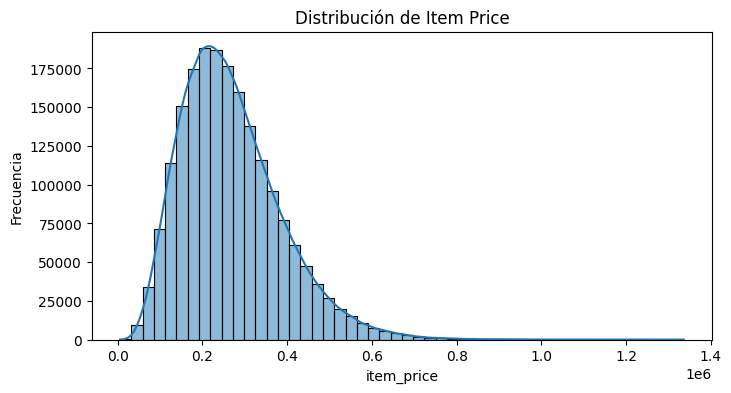

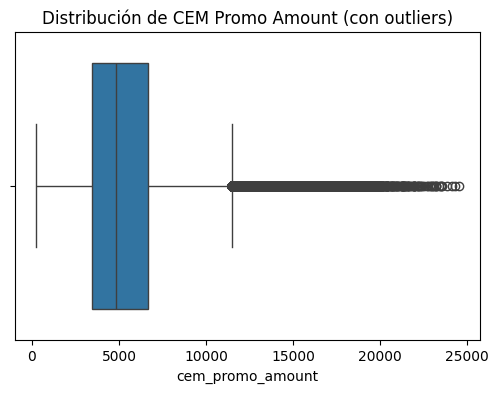

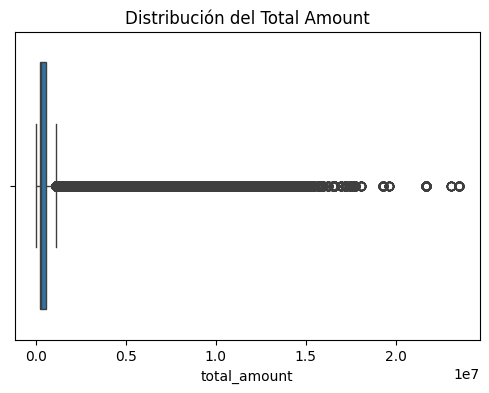

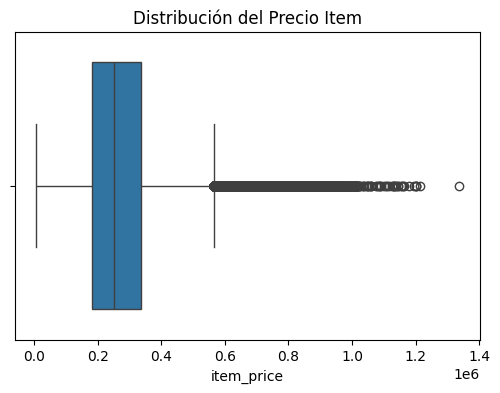

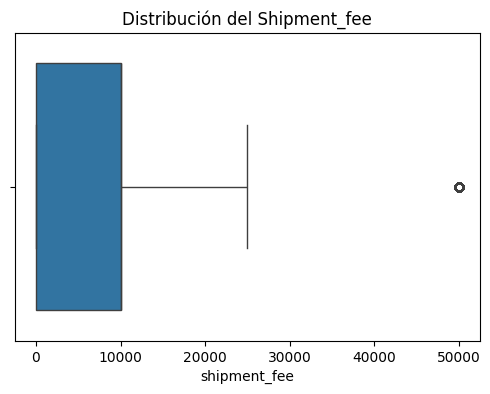

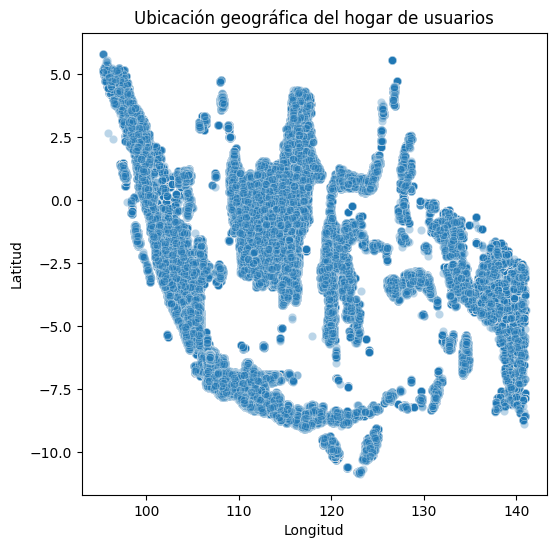

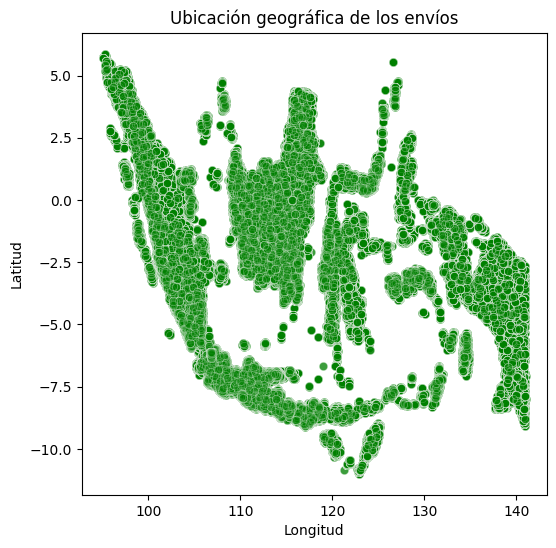

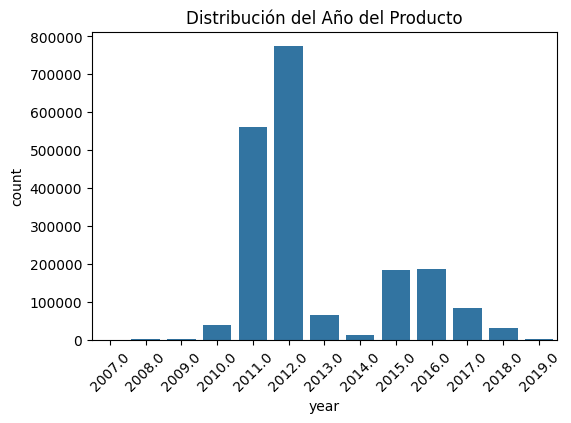

CPU times: total: 2min 32s
Wall time: 2min 43s


In [3]:
%%time
# Cargar los datos numéricos desde la tabla
query = """
SELECT
    item_price,
    product_quantity,
    cem_promo_amount,
    transaction_promo_amount,
    shipment_fee,
    total_amount,
    home_location_lat,
    home_location_long,
    shipment_location_lat,
    shipment_location_long,
    year
FROM Full_Customer_Event_Data
WHERE 
    item_price IS NOT NULL OR 
    product_quantity IS NOT NULL OR
    cem_promo_amount IS NOT NULL OR
    transaction_promo_amount IS NOT NULL OR
    shipment_fee IS NOT NULL OR
    total_amount IS NOT NULL OR
    home_location_lat IS NOT NULL OR
    shipment_location_lat IS NOT NULL;
"""

df = pd.read_sql_query(query, con=engine)

# Estadísticas descriptivas
print("Estadísticas descriptivas de variables numéricas:")
display(df.describe())

# Histograma de precios
plt.figure(figsize=(8,4))
sns.histplot(df['item_price'].dropna(), bins=50, kde=True)
plt.title("Distribución de Item Price")
plt.xlabel("item_price")
plt.ylabel("Frecuencia")
plt.show()


# Boxplot del importe promocional
plt.figure(figsize=(6,4))
sns.boxplot(x=df['cem_promo_amount'].dropna())
plt.title("Distribución de CEM Promo Amount (con outliers)")
plt.xlabel("cem_promo_amount")
plt.show()

# Boxplot del importe total de transacción
plt.figure(figsize=(6,4))
sns.boxplot(x=df['total_amount'].dropna())
plt.title("Distribución del Total Amount")
plt.xlabel("total_amount")
plt.show()

# Boxplot del precio_item
plt.figure(figsize=(6,4))
sns.boxplot(x=df['item_price'].dropna())
plt.title("Distribución del Precio Item")
plt.xlabel("item_price")
plt.show()

# Boxplot del importe de gastos de envío
plt.figure(figsize=(6,4))
sns.boxplot(x=df['shipment_fee'].dropna())
plt.title("Distribución del Shipment_fee")
plt.xlabel("shipment_fee")
plt.show()

# Dispersión de coordenadas de ubicación del hogar
plt.figure(figsize=(6,6))
sns.scatterplot(x='home_location_long', y='home_location_lat', data=df, alpha=0.3)
plt.title("Ubicación geográfica del hogar de usuarios")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

# Dispersión de ubicación de envíos
plt.figure(figsize=(6,6))
sns.scatterplot(x='shipment_location_long', y='shipment_location_lat', data=df, alpha=0.3, color='green')
plt.title("Ubicación geográfica de los envíos")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.show()

# Distribución del año de producto
plt.figure(figsize=(6,4))
sns.countplot(x='year', data=df)
plt.title("Distribución del Año del Producto")
plt.xticks(rotation=45)
plt.show()

## Análisis e interpretación de variables numéricas

Tras la obtención de las estadísticas descriptivas de las principales variables numéricas de la tabla `Full_Customer_Event_Data`, se pueden destacar los siguientes hallazgos:

### Variables económicas

- **`item_price`**:
  - Precio medio unitario elevado (267.641 €), con un rango amplio que va desde 5.600 € hasta 1.335.959 €.
  - Existe una dispersión considerable (`std = 118.162 €`), indicando fuerte variabilidad en el catálogo de productos.
  - Presencia probable de outliers, que deberá analizarse mediante visualizaciones específicas.

- **`cem_promo_amount` y `transaction_promo_amount`**:
  - Importes promocionales medios de 5.331 € y 2.317 €, respectivamente.
  - `transaction_promo_amount` presenta un 50% de valores nulos o 0 (mediana = 0), lo que sugiere que en muchas transacciones no se aplicaron promociones.

- **`shipment_fee`**:
  - El coste medio de envío ronda los 9.191 €, con alta desviación estándar (9.374 €).
  - La mediana (10.000 €) muestra que la mayoría de envíos se agrupan en torno a un valor fijo.

- **`total_amount`**:
  - El valor medio de transacción es de 621.188 €, aunque el máximo llega hasta 23.504.490 €, lo que confirma la presencia de valores extremos significativos.

### Variables de cantidad

- **`product_quantity`**:
  - La mayoría de transacciones corresponden a la compra de una sola unidad (mediana y percentiles 25% y 75% = 1).
  - Existen casos atípicos de hasta 48 unidades en una sola transacción, que deberán ser analizados como posibles excepciones.

### Variables geográficas

- **`home_location_lat`, `home_location_long`, `shipment_location_lat`, `shipment_location_long`**:
  - Las coordenadas presentan valores concentrados en torno a rangos lógicos (latitudes entre -10° y 5°, longitudes entre 95° y 141°).
  - Esto sugiere un ámbito geográfico consistente, aunque será necesario confirmar que no existan registros erróneos (por ejemplo, coordenadas que caigan fuera de la región objetivo).

### Variable temporal

- **`year`**:
  - El año medio asociado a los productos es 2012, con un rango que va de 2007 a 2019.
  - Este rango temporal permitirá analizar tendencias históricas en los productos ofrecidos.

## Conclusiones preliminares

- Es necesaria la **detección y posible tratamiento de outliers** en `item_price`, `shipment_fee` y `total_amount`.
- Variables como `transaction_promo_amount` muestran **distribuciones sesgadas hacia cero**, lo que puede requerir transformaciones o filtrados en etapas de modelado.
- El análisis espacial preliminar sugiere datos geográficos razonables, aunque será conveniente validar ubicaciones extremas o atípicas.
- La distribución del año (`year`) puede ser utilizada para analizar la antigüedad de los productos y su impacto en el comportamiento de compra.

Este análisis de las variables numéricas constituye un primer paso esencial para el posterior diseño de transformaciones, filtrados y estrategias de segmentación o predicción basadas en datos cuantitativos.


### Próximas acciones

- Visualizar la distribución de variables como `item_price`, `total_amount`, `promo_amount` y `shipment_fee` mediante histogramas y boxplots.
- Identificar y tratar outliers para evitar su impacto en los modelos predictivos.
- Analizar la relación entre `item_price`, `promo_amount` y `was_purchased` para evaluar la sensibilidad al precio y las promociones.


## 5: Análisis de variables categóricas

### Objetivo

El análisis de variables categóricas permite conocer la distribución de valores únicos en atributos no numéricos. Este paso es esencial para:

- Detectar desequilibrios o valores dominantes.
- Identificar categorías poco frecuentes o inconsistentes.
- Comprender el perfil típico de los usuarios, productos o eventos.
- Evaluar posibles agrupaciones o recodificaciones para análisis más eficaces.

---

### Variables categóricas analizadas

Las principales variables categóricas seleccionadas de la tabla `Full_Customer_Event_Data` incluyen:

- `device_type`: Tipo de dispositivo usado en la navegación.
- `traffic_source`: Canal de entrada a la web o app.
- `customer_gender`: Género declarado del cliente.
- `payment_method`: Método de pago seleccionado.
- `transaction_payment_status`: Estado del pago.
- `event_name`: Tipo de evento registrado (clic, compra, búsqueda, etc.).
- `mastercategory`, `subcategory`, `articletype`, `season`, `usage`: Características del producto.
- `home_location`: Región o provincia de residencia del cliente.
- `home_country`: País de residencia del cliente.

Estas variables permiten estudiar tanto el comportamiento del usuario como la tipología de productos y su distribución geográfica.

> **Nota**: Se anticipa que `home_country` tendrá baja variabilidad (mayoritariamente "Indonesia"), mientras que `home_location` permitirá realizar segmentaciones regionales más detalladas.

---

### Metodología

Para cada variable se ha calculado:

- Número de categorías únicas (`nunique`)
- Frecuencia absoluta de cada categoría
- Porcentaje relativo sobre el total de observaciones válidas

Este análisis permite detectar valores atípicos, categorías dominantes y oportunidades para agrupar clases raras o recodificar.

> El análisis se complementa con gráficos de barras para visualizar el dominio o dispersión de cada categoría, facilitando decisiones de ingeniería de variables y preparación para modelado.



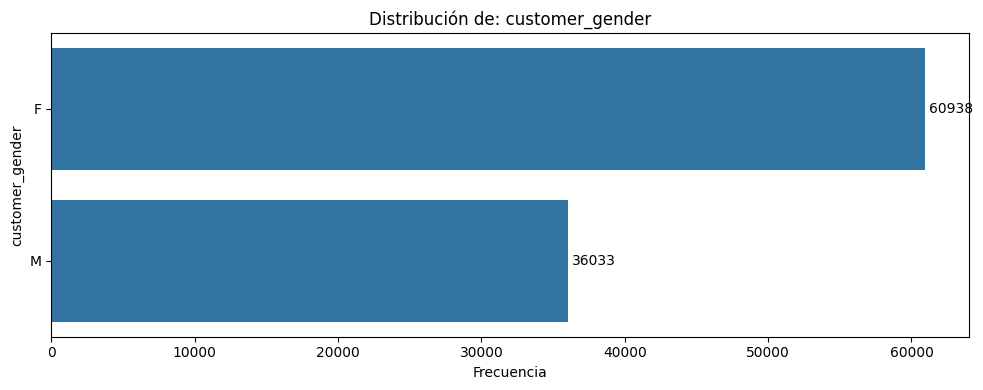

📌 Cardinalidad de `customer_gender`: 2 categorías únicas



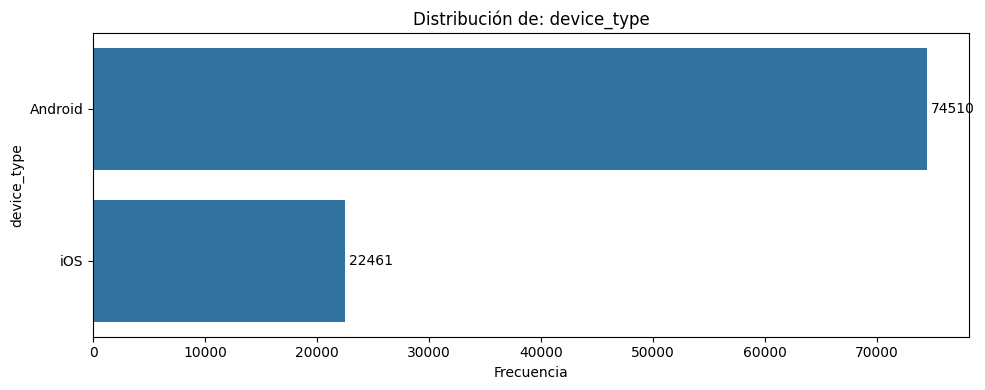

📌 Cardinalidad de `device_type`: 2 categorías únicas



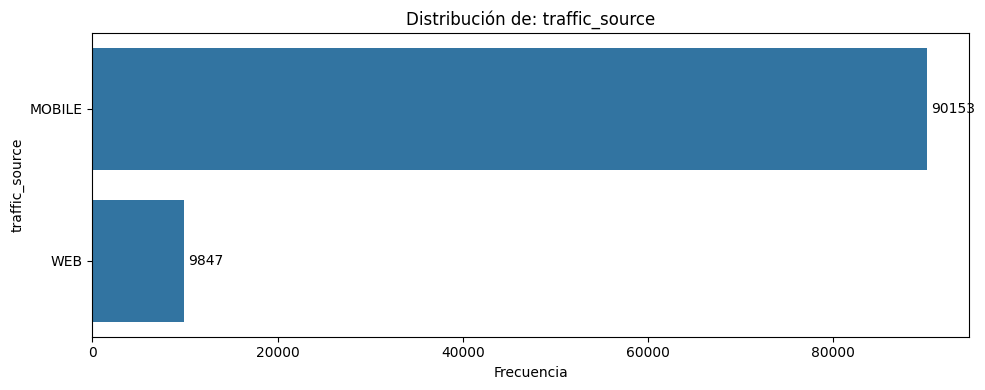

📌 Cardinalidad de `traffic_source`: 2 categorías únicas



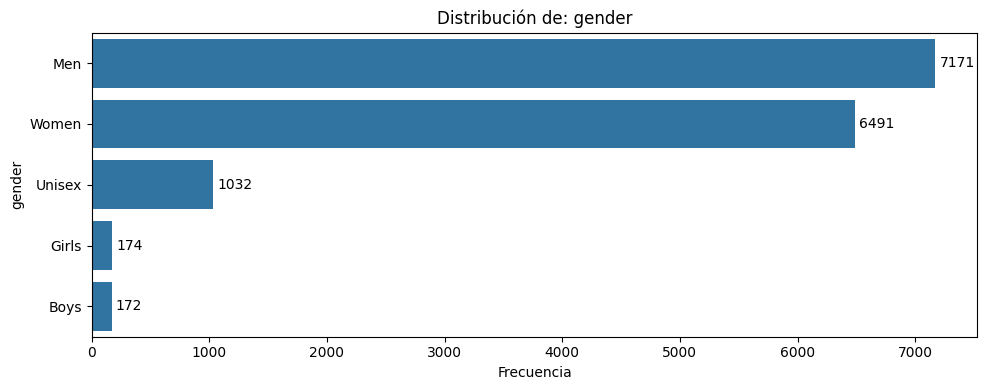

📌 Cardinalidad de `gender`: 5 categorías únicas



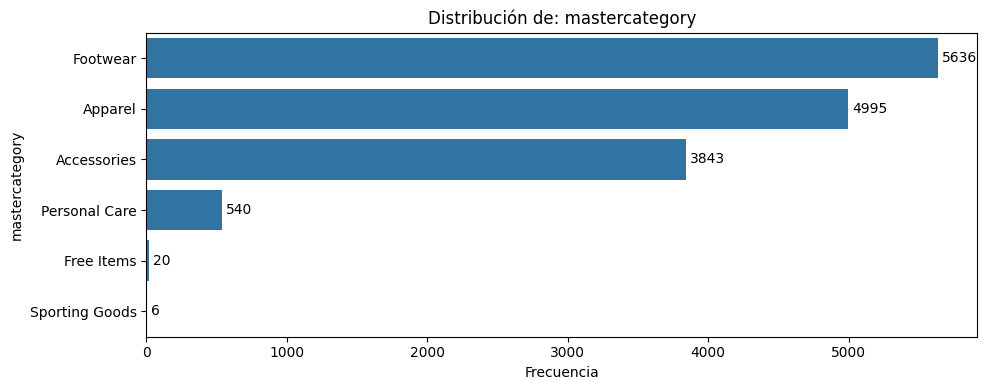

📌 Cardinalidad de `mastercategory`: 6 categorías únicas



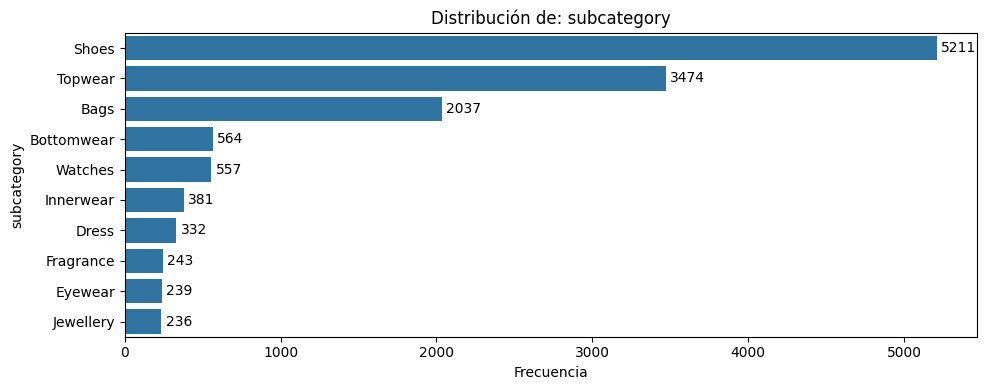

📌 Cardinalidad de `subcategory`: 37 categorías únicas



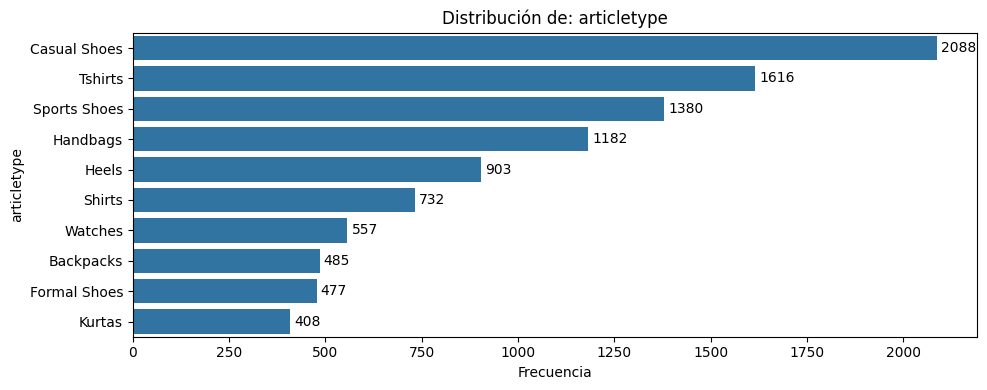

📌 Cardinalidad de `articletype`: 123 categorías únicas



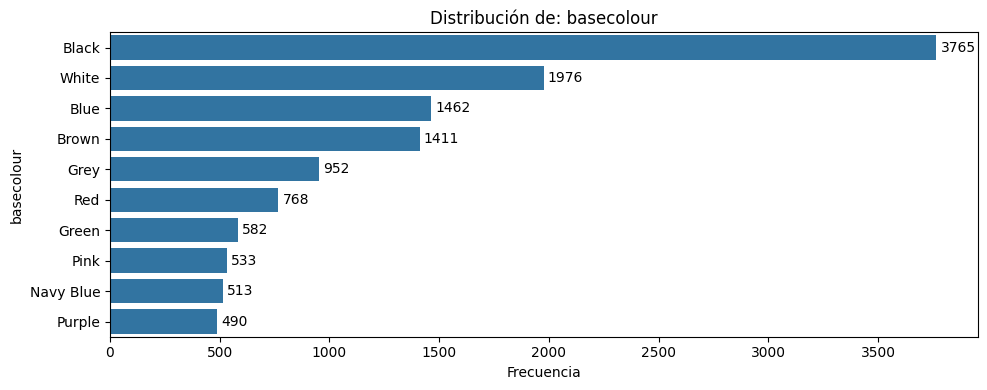

📌 Cardinalidad de `basecolour`: 47 categorías únicas



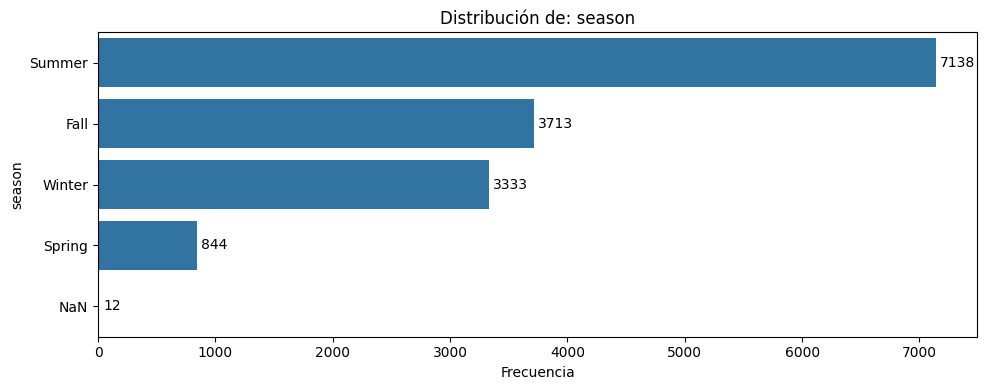

📌 Cardinalidad de `season`: 5 categorías únicas



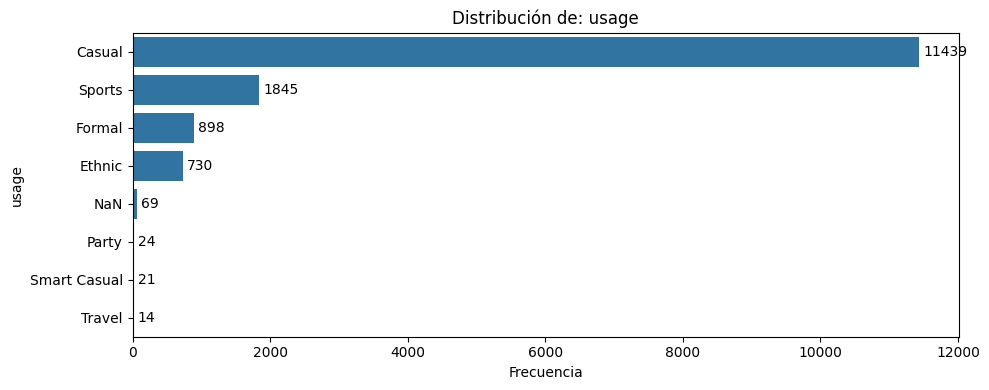

📌 Cardinalidad de `usage`: 8 categorías únicas



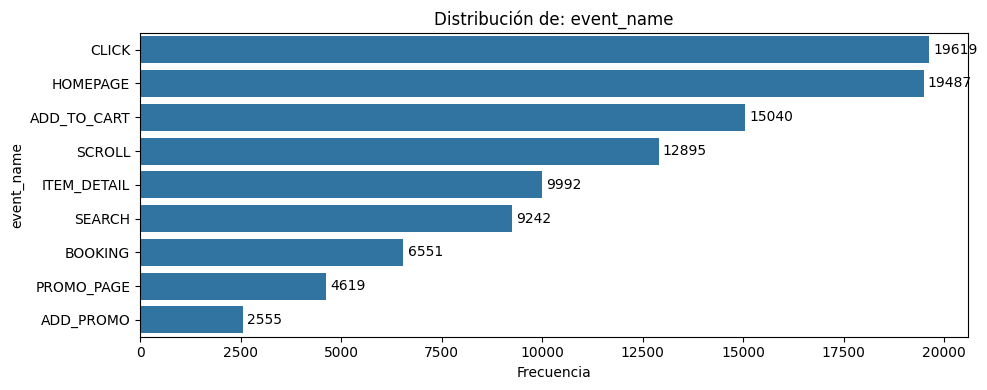

📌 Cardinalidad de `event_name`: 9 categorías únicas



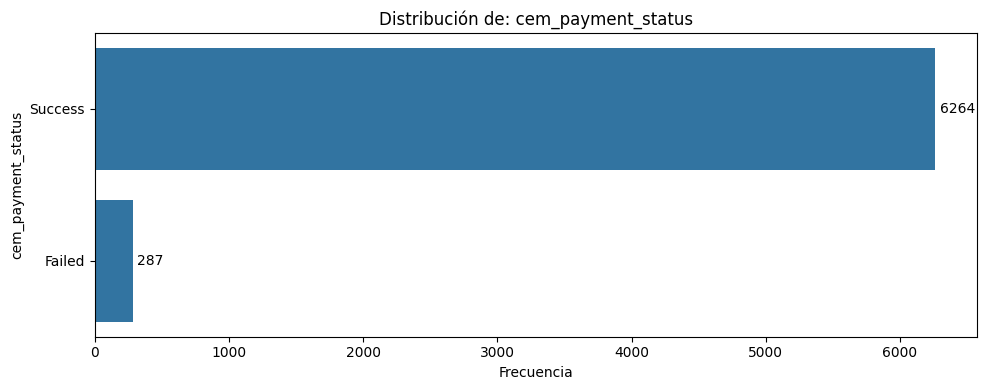

📌 Cardinalidad de `cem_payment_status`: 2 categorías únicas



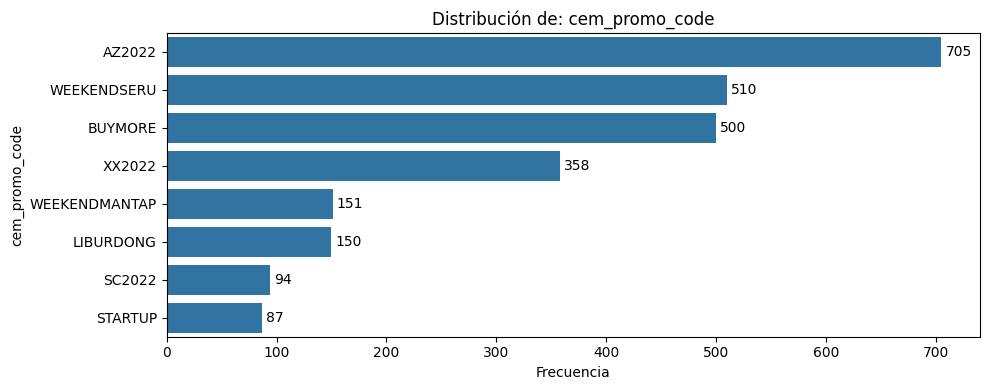

📌 Cardinalidad de `cem_promo_code`: 8 categorías únicas



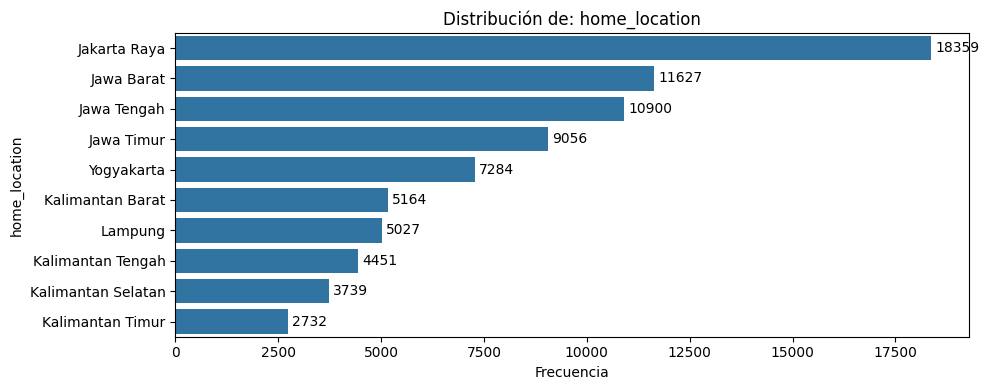

📌 Cardinalidad de `home_location`: 33 categorías únicas



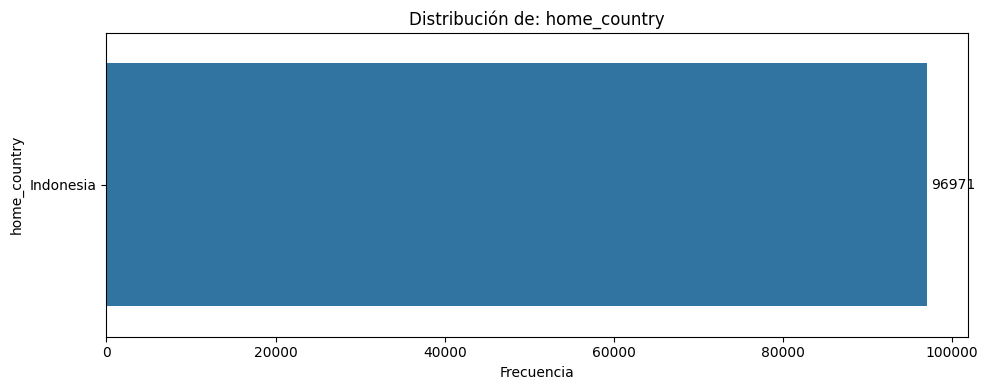

📌 Cardinalidad de `home_country`: 1 categorías únicas

CPU times: total: 3.28 s
Wall time: 3.38 s


In [4]:
%%time
# Lista de variables categóricas reales en la tabla (ampliada)
categorical_columns = [
    'customer_gender', 'device_type', 'traffic_source',
    'gender', 'mastercategory', 'subcategory',
    'articletype', 'basecolour', 'season', 'usage',
    'event_name', 'cem_payment_status', 'cem_promo_code',
    'home_location', 'home_country'  
]

# Consulta SQL ajustada para extraer estas columnas
query = f"""
SELECT {', '.join(categorical_columns)}
FROM Full_Customer_Event_Data
WHERE event_name IS NOT NULL
LIMIT 100000  -- Opcional: limitar para eficiencia
"""
df_cat = pd.read_sql_query(query, con=engine)

# Función para graficar y mostrar distribución de categorías
def plot_category_distribution(df, column, top_n=10):
    plt.figure(figsize=(10, 4))
    order = df[column].value_counts().iloc[:top_n].index
    ax = sns.countplot(data=df, y=column, order=order)
    plt.title(f'Distribución de: {column}')
    plt.xlabel('Frecuencia')
    plt.ylabel(column)

    # Añadir los valores sobre cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge', padding=3)

    plt.tight_layout()
    plt.show()
    
    print(f"📌 Cardinalidad de `{column}`: {df[column].nunique()} categorías únicas\n")

# Visualizar cada variable categórica
for col in categorical_columns:
    plot_category_distribution(df_cat, col)



In [31]:
%%time
# Lista de variables categóricas
categorical_columns = [
    'customer_gender', 'device_type', 'traffic_source',
    'gender', 'mastercategory', 'subcategory',
    'articletype', 'basecolour', 'season', 'usage',
    'event_name', 'cem_payment_status', 'cem_promo_code',
    'home_location', 'home_country' 
]

# Consulta SQL para extraer solo esas columnas
query = f"""
SELECT {', '.join(categorical_columns)}
FROM Full_Customer_Event_Data
WHERE event_name IS NOT NULL
"""
df_cat = pd.read_sql_query(query, con=engine)

# Crear tabla resumen
summary_data = []

for col in categorical_columns:
    total = df_cat.shape[0]
    n_unique = df_cat[col].nunique()
    most_freq = df_cat[col].value_counts(dropna=True).idxmax()
    most_freq_count = df_cat[col].value_counts(dropna=True).max()
    most_freq_pct = (most_freq_count / total) * 100
    
    summary_data.append({
        'Variable': col,
        'Categorías únicas': n_unique,
        'Más frecuente': most_freq,
        'Frecuencia': most_freq_count,
        '% del total': round(most_freq_pct, 2)
    })

# Crear y mostrar el dataframe resumen
summary_df = pd.DataFrame(summary_data).sort_values(by='% del total', ascending=False)
summary_df

CPU times: total: 54.6 s
Wall time: 1min 2s


,Variable,Categorías únicas,Más frecuente,Frecuencia,% del total
14,home_country,1,Indonesia,12463004,97.11
2,traffic_source,2,MOBILE,11548304,89.98
1,device_type,2,Android,9597230,74.78
0,customer_gender,2,F,7944048,61.90
10,event_name,9,CLICK,2498038,19.46
13,home_location,33,Jakarta Raya,2301178,17.93
9,usage,9,Casual,1475905,11.50
8,season,5,Summer,933193,7.27
3,gender,5,Men,911647,7.10
11,cem_payment_status,2,Success,815962,6.36


### Conclusiones del análisis de variables categóricas

A partir del resumen tabular de las principales variables categóricas del dataset `Full_Customer_Event_Data`, se obtienen las siguientes observaciones clave:

---

#### Variables con baja cardinalidad y distribución concentrada

Las siguientes variables presentan solo 2 categorías, con una clara dominancia de un valor:

- `traffic_source`: **MOBILE** representa el 89.98% del tráfico.
- `device_type`: **Android** supone el 74.78% de los dispositivos.
- `customer_gender`: El 61.90% de los clientes son de género **femenino (F)**.

 Estas variables son aptas para análisis descriptivo y modelos predictivos sin necesidad de transformación compleja (one-hot encoding estándar).

---

#### Variables de comportamiento y producto con mayor dispersión

- `event_name` tiene **9 categorías**, siendo **CLICK** la más frecuente (19.46%). Muy útil para análisis de embudo y comportamiento del usuario.

- Variables como `usage` (9 categorías), `season` (5), `gender` (5), `mastercategory` (7), `subcategory` (45) y `cem_payment_status` (2) presentan una diversidad razonable, aunque algunas podrían beneficiarse de agrupación semántica o por frecuencia.

 Recomendación: aplicar **agrupaciones lógicas** (por ejemplo, tipos de producto o temporadas) o conservar las principales categorías y agrupar las menos frecuentes en “Otros”.

---

#### Variables con alta cardinalidad o escasa representatividad

- `basecolour` (47 categorías) y `articletype` (143 categorías) presentan una **alta dispersión**. Las categorías más frecuentes —**Black** y **Casual Shoes**— representan solo un **3.73%** y **2.02%**, respectivamente.

 Recomendación: agrupar por familias (p. ej. colores neutros vs brillantes, tipos de calzado) o aplicar técnicas de **reducción de cardinalidad** para evitar ruido y sobreajuste.

- `cem_promo_code` tiene 8 valores, pero el más frecuente (**AZ2022**) representa solo un **0.70%** del total.

 Recomendación: convertir en una variable binaria (`has_promo = True/False`) o agrupar como "más usados" vs "otros".

---

#### Variables geográficas

- `home_country` tiene una única categoría (**Indonesia**, 97.11%). No aporta valor discriminativo.

 Recomendación: puede ser eliminada del análisis activo por baja variabilidad.

- `home_location` cuenta con **33 regiones**, siendo **Jakarta Raya** la más frecuente (17.93%). Es potencialmente útil para segmentación regional o visualización geográfica.

---

####  Recomendaciones generales

- Las variables con **baja cardinalidad** pueden usarse directamente en modelos y dashboards.

- Las variables con **cardinalidad media** pueden beneficiarse de **agrupaciones**, **codificación supervisada** o **label encoding** según el modelo.

- Las variables con **alta dispersión** (como `articletype`) deben ser evaluadas cuidadosamente antes de su uso, para evitar sobreajuste o ruido.

---

Este análisis guía la selección y tratamiento de las variables categóricas para las siguientes fases del TFM: **segmentación de clientes**, **modelado predictivo** y **visualización en Power BI**.



### Decisiones sobre variables con alta cardinalidad o escasa representatividad

Las variables categóricas con un elevado número de categorías únicas o con una baja frecuencia relativa en sus valores más comunes presentan desafíos específicos para el análisis y el modelado predictivo:

- **Alta cardinalidad** puede generar ruido, sobreajuste en modelos de machine learning y dificultar la interpretación en visualizaciones.
- **Baja representatividad** de las categorías más frecuentes indica que la información está muy dispersa, dificultando su uso como variable explicativa directa.

Este apartado tiene como objetivo **evaluar una a una** estas variables, proponiendo acciones concretas como:

- Agrupación de categorías poco frecuentes en una clase "Otros".
- Conversión a variables binarias (por ejemplo, presencia o ausencia de promoción).
- Codificación específica (label encoding, target encoding).
- O, en algunos casos, eliminación del análisis activo por bajo valor analítico.

---

###  Variables con alta cardinalidad o escasa representatividad detectadas:

1. `articletype` (143 categorías) – La categoría más frecuente solo representa el 2.02%.
2. `basecolour` (47 categorías) – La más frecuente tiene una presencia del 3.73%.
3. `subcategory` (45 categorías) – Reparto disperso entre clases.
4. `cem_promo_code` (8 categorías) – La más común representa solo el 0.70%.
5. `home_location` (33 categorías) – Aunque útil geográficamente, presenta cierta concentración en `Jakarta Raya`.
6. `gender` (5 categorías) – Aunque manejable, su relevancia depende del cruce con producto.
7. `usage` (9 categorías) – Puede requerir agrupaciones semánticas.
8. `season` (5 categorías) – Posible recodificación en caliente/fría, por ejemplo.

> En la siguiente sección se detallarán las decisiones específicas a tomar sobre cada una de estas variables, con el objetivo de preparar el dataset para una modelización eficiente y robusta.


### Variable: `articletype`

#### Descripción
- **Cardinalidad**: 143 categorías únicas
- **Categoría más frecuente**: `Casual Shoes` (2.02% del total)
- **Tipo de variable**: Categórica nominal (producto)
- **Problema identificado**: Alta dispersión → muchas categorías tienen presencia residual.

---

#### Riesgos y dificultades
- Aumenta la dimensionalidad en codificación one-hot.
- Introduce ruido en modelos si no se agrupa o reduce.
- Puede provocar **sobreajuste** en algoritmos sensibles a variables categóricas no agregadas (como árboles de decisión).
- Dificulta la interpretación en visualizaciones (gráficos, tablas, dashboards).

---

#### Decisión y tratamiento recomendado

| Acción                           | Justificación                                                                 |
|----------------------------------|------------------------------------------------------------------------------|
| Agrupar categorías poco frecuentes en `"Otros"` | Simplificar estructura, reducir ruido y evitar sobreajuste.                 |
| Conservar top 10-15 categorías más frecuentes  | Capturan la mayoría de la información relevante.                           |
| Evaluar agrupación semántica por familia (zapatos, camisetas, etc.) | Mejora interpretabilidad y posibles insights de producto.                   |
| Aplicar codificación supervisada (`target encoding`) para modelos ML avanzados | Si se demuestra correlación con variables objetivo como `was_purchased`.   |

---

#### Observación adicional

La variable `articletype` es **relevante para sistemas de recomendación** y análisis de comportamiento de compra, pero debe ser tratada con precaución para evitar que su alta cardinalidad perjudique la calidad del modelo o la visualización.

> Esta variable se mantendrá **en análisis**, pero será **preprocesada con técnicas de reducción de cardinalidad** antes de ser usada en segmentación o modelado predictivo.


In [36]:
# Distribución porcentual de articletype

# Consulta SQL para obtener la frecuencia de cada categoría de articletype
query = """
SELECT articletype, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE articletype IS NOT NULL
GROUP BY articletype
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_articletype = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_articletype['frecuencia'].sum()

# Añadir columna con el porcentaje
df_articletype['porcentaje'] = (df_articletype['frecuencia'] / total * 100).round(2)
df_articletype.head(50)

,articletype,frecuencia,porcentaje
0,Casual Shoes,258839,13.36
1,Tshirts,199030,10.27
2,Sports Shoes,185378,9.57
3,Handbags,159795,8.25
4,Heels,120695,6.23
5,Shirts,90843,4.69
6,Watches,71391,3.69
7,Backpacks,65974,3.41
8,Formal Shoes,57906,2.99
9,Kurtas,51893,2.68


### Análisis de distribución de `articletype` (Top 50 categorías)

A continuación se resumen las observaciones clave a partir de los 50 primeros valores de la variable `articletype`:

---

#### Distribución acumulada

- Las **10 categorías más frecuentes** concentran el **64.84%** de los registros (`Casual Shoes` a `Kurtas`).
- Las **primeras 20 categorías** ya cubren más del **85%** del total.
- A partir de la posición **21 (`Perfume and Body Mist`)**, todas las categorías tienen **menos del 1%** de participación individual.
- Desde la posición **28 en adelante**, la frecuencia individual es **menor al 0.5%**.

---

#### Decisión de transformación

| Acción                                   | Justificación                                                                          |
|------------------------------------------|----------------------------------------------------------------------------------------|
| Conservar top 20 categorías              | Representan la gran mayoría del volumen total y aportan valor semántico al análisis.  |
| Agrupar categorías < 1% en "Otros"       | Simplifica la variable sin perder las principales categorías representativas.         |
| Etiquetar como "Otros" en el preprocesado| Evita ruido y dimensionalidad excesiva en modelos de ML y visualizaciones.            |

---

#### Siguiente paso técnico

Se generará una nueva columna `articletype_reduced`, donde:

- Si `articletype` ∈ Top 20 → se conserva el valor original.
- Si no → se asigna `"Otros"`.

Esta variable transformada se usará en dashboards, análisis de segmentación y como input para modelos predictivos.

> Este enfoque reduce la cardinalidad de `articletype` de **143 a 21 clases**, manteniendo la interpretabilidad y optimizando el rendimiento analítico.


### Variable: `basecolour`

#### Descripción
- **Cardinalidad**: 47 categorías únicas
- **Categoría más frecuente**: `Black` (3.73% del total)
- **Tipo de variable**: Categórica nominal (color principal del producto)
- **Problema identificado**: Alta dispersión → muchas categorías tienen baja frecuencia individual.

---

#### Riesgos y dificultades

- Gran número de colores poco frecuentes (tonos específicos) que pueden aportar poco valor predictivo.
- Codificación one-hot puede generar alta dimensionalidad con columnas poco informativas.
- Interpretación visual compleja si se mantiene sin agrupar.

---

#### Decisión y tratamiento recomendado

| Acción                                        | Justificación                                                                 |
|-----------------------------------------------|------------------------------------------------------------------------------|
| Agrupar por familias de colores (oscuros, claros, neutros, vivos...) | Mejora la interpretabilidad e insights en visualizaciones y modelos.         |
| Conservar los colores más frecuentes (Top 10)  | Garantiza la conservación de los más representativos.                        |
| Reetiquetar el resto como `"Otros"`            | Reduce la cardinalidad y evita ruido en modelos de machine learning.         |
| Posible codificación ordinal o semántica       | Útil si se detecta relación entre color y comportamiento (compra, clic, etc).|

---

#### Observación adicional

Aunque `basecolour` puede parecer poco relevante a nivel superficial, **puede influir en la conversión o elección de producto** dependiendo del tipo de prenda o perfil de cliente.

> Por tanto, se mantendrá como variable activa tras un proceso de **agrupación semántica o por frecuencia**, con el objetivo de balancear utilidad analítica y simplicidad estructural.


In [37]:
# Consulta SQL para obtener la frecuencia de cada categoría de basecolour
query = """
SELECT basecolour, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE basecolour IS NOT NULL
GROUP BY basecolour
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_basecolour = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_basecolour['frecuencia'].sum()

# Añadir columna con el porcentaje
df_basecolour['porcentaje'] = (df_basecolour['frecuencia'] / total * 100).round(2)

df_basecolour

,basecolour,frecuencia,porcentaje
0,Black,478846,24.72
1,White,255591,13.19
2,Brown,187618,9.69
3,Blue,185595,9.58
4,Grey,119398,6.16
5,Red,98699,5.10
6,Green,77485,4.00
7,Pink,69532,3.59
8,Navy Blue,67515,3.49
9,Purple,61581,3.18


### Variable: `basecolour`

#### Descripción
- **Cardinalidad original**: 47 colores distintos.
- La categoría más frecuente es `Black` (24.72%), seguida de `White` (13.19%) y `Brown` (9.69%).
- A partir de la posición 17 (`Multi`), cada color representa menos del 1% del total.
- Muchos colores son variaciones específicas de una tonalidad (p. ej., `Olive`, `Khaki`, `Tan`, `Mushroom Brown`, etc.).

---

#### Problemas detectados

- **Alta dispersión** de categorías individuales que pueden agruparse lógicamente.
- **Dificultad de interpretación** en visualizaciones o dashboards si se mantienen los 47 colores.
- **Ruido en modelos predictivos** si se usan colores muy específicos como clases separadas.

---

#### Decisión y tratamiento recomendado

| Acción                                        | Justificación                                                                 |
|-----------------------------------------------|------------------------------------------------------------------------------|
| Agrupar colores en **familias semánticas**    | Mejora la legibilidad, reduce cardinalidad sin perder el significado visual. |
| Conservar las siguientes **familias de color**: |
| `Neutros`: Black, White, Grey, Silver, Beige, Cream, Off White, Charcoal     |
| `Tierra`: Brown, Maroon, Olive, Khaki, Tan, Rust, Mushroom Brown, Coffee Brown |
| `Cálidos`: Red, Orange, Pink, Peach, Coral, Rose, Magenta                    |
| `Fríos`: Blue, Navy Blue, Purple, Lavender, Turquoise Blue, Sea Green, Teal, Green |
| `Metálicos`: Gold, Bronze, Copper, Metallic, Steel                           |
| `Otros`: Multi, Fluorescent Green, Lime Green, Skin, Nude, Mustard, Taupe, etc. |

---

#### Observación adicional

La agrupación por **familias de color** permite:
- Facilitar el análisis estético de productos.
- Reducir ruido y dimensionalidad sin sacrificar información relevante.
- Integrarse fácilmente en dashboards y modelos (como variable categórica de 6–8 clases).

> La nueva variable `basecolour_grouped` sustituirá a `basecolour` en análisis posteriores, con un total de **6 familias de color** bien definidas.


### Variable: `subcategory`

#### Descripción
- **Cardinalidad**: 45 subcategorías distintas.
- La más frecuente es `Shoes` (5.21%), seguida de `Tshirts`, `Watches`, `Handbags`, etc.
- Muchas subcategorías representan productos muy específicos pero semánticamente similares (p. ej. `Sandals`, `Flip Flops`, `Casual Shoes`, etc.).
- Alta fragmentación en términos de naming, aunque pertenecen a las mismas familias de producto.

---

In [4]:
# Consulta SQL para obtener la frecuencia de cada subcategoría
query = """
SELECT subcategory, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE subcategory IS NOT NULL
GROUP BY subcategory
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_subcategory = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_subcategory['frecuencia'].sum()

# Añadir columna con el porcentaje
df_subcategory['porcentaje'] = (df_subcategory['frecuencia'] / total * 100).round(2)

df_subcategory

,subcategory,frecuencia,porcentaje
0,Shoes,668315,34.50
1,Topwear,434275,22.42
2,Bags,278190,14.36
3,Bottomwear,76364,3.94
4,Watches,71391,3.69
5,Innerwear,51262,2.65
6,Dress,43453,2.24
7,Jewellery,30430,1.57
8,Eyewear,30370,1.57
9,Fragrance,28581,1.48


#### Problemas detectados

- Algunas subcategorías son muy parecidas y podrían agruparse bajo un mismo tipo de producto principal.
- Codificarlas individualmente complica la visualización y puede inducir ruido en modelos.
- Bajo porcentaje de participación individual para muchas categorías (<2%).

---

#### Decisión y tratamiento recomendado

| Acción                                           | Justificación                                                                 |
|--------------------------------------------------|--------------------------------------------------------------------------------|
| Agrupar las subcategorías en **familias de producto** | Mejora interpretabilidad y reduce dimensionalidad sin pérdida de contexto.   |
| Familias propuestas:                              |                                                                                |
| 👟 **Calzado**: Shoes, Sandals, Flip Flops, Casual Shoes, Formal Shoes, Heels, Flats, Sports Shoes |
| 👚 **Ropa superior**: Tshirts, Shirts, Tops, Sweatshirts, Jackets, Sweaters, Blouses |
| 👖 **Ropa inferior**: Jeans, Trousers, Shorts, Track Pants, Capris, Leggings     |
| 👗 **Vestimenta tradicional / vestidos**: Dresses, Kurtas, Sarees, Kurtis, Tunics, Nightdress |
| 👜 **Accesorios y bolsos**: Handbags, Wallets, Clutches, Duffel Bag, Backpacks, Laptop Bag |
| ⌚ **Complementos personales**: Watches, Belts, Socks, Caps, Ties, Innerwear Vests |
| 💄 **Cosmética / Belleza**: Lipstick, Lip Gloss, Nail Polish, Deodorant, Perfume and Body Mist |
| 💍 **Joyería**: Earrings, Necklace and Chains, Pendant                             |
| 🔁 **Otros**: Categorías de baja frecuencia o sin asignación clara                |

---

#### Observación adicional

`subcategory` es una variable clave para:

- **Análisis de producto** (tipo de artículo más vendido por segmento).
- **Sistemas de recomendación** (productos similares).
- **Segmentación** por tipo de interés del cliente.

> Por ello, se mantendrá en forma agrupada bajo una nueva variable `subcategory_grouped`, compuesta por **9 macrogrupos** definidos por afinidad funcional y semántica.


### Variable: `cem_promo_code`

#### Descripción
- **Cardinalidad**: 8 códigos únicos.
- **Categoría más frecuente**: `AZ2022`, con solo **0.70%** del total de registros.
- La mayoría de los registros no contienen código promocional (`NULL` en más del 97% de los casos).
- Variable de tipo `text`, representa un valor cualitativo asociado a una promoción puntual.

---

#### Problemas detectados

- Baja cobertura: los códigos promocionales están presentes solo en una fracción mínima del total de eventos.
- La dispersión entre códigos es alta: ninguno destaca significativamente por volumen.
- Como variable categórica directa, **no aporta valor predictivo suficiente** debido a su baja frecuencia.

---

#### Decisión y tratamiento recomendado

| Acción                                         | Justificación                                                                     |
|------------------------------------------------|------------------------------------------------------------------------------------|
| Convertir `cem_promo_code` en una variable binaria: `has_promo` (`True` / `False`) | Permite capturar si el evento estuvo promocionado sin generar cardinalidad extra. |
| Eliminar `cem_promo_code` original del análisis activo                             | Por su baja representatividad individual y escasa capacidad explicativa directa.   |
| Usar `has_promo` para:                                                              |                                                                                   |
| - Evaluar impacto de promociones en la conversión (`was_purchased`)               |                                                                                   |
| - Segmentar usuarios que reaccionan a descuentos                                   |                                                                                   |

---

#### Observación adicional

Aunque `cem_promo_code` no es útil como variable categórica, **la presencia o ausencia de una promoción sí puede ser determinante** en el comportamiento de compra, especialmente en eventos como "ADD_TO_CART" o "PURCHASE".

> Se generará una variable derivada `has_promo` como campo booleano para su uso en análisis de efectividad promocional, segmentación o visualización.


### Variable: `home_location`

#### Descripción
- **Cardinalidad**: 33 ubicaciones únicas (provincias/regiones de Indonesia).
- **Categoría más frecuente**: `Jakarta Raya`, con un 17.93% del total.
- Representa la **región o provincia de residencia** del cliente.
- Se complementa con `home_location_lat` y `home_location_long` para visualización geográfica.

---

#### Consideraciones analíticas

- Aunque tiene una **distribución desigual**, no presenta una dispersión tan crítica como `articletype` o `basecolour`.
- Es una variable **clave para segmentación geográfica**, análisis regional de comportamiento y visualización en mapas.
- Algunas ubicaciones tienen participación muy baja, pero el número total de categorías es manejable.

---

#### Decisión y tratamiento recomendado

| Acción                                       | Justificación                                                              |
|----------------------------------------------|---------------------------------------------------------------------------|
| Conservar `home_location` como variable categórica | Permite análisis y segmentación por región sin exceso de cardinalidad.  |
| Evaluar agrupación geográfica si se desea simplificar (por islas o macrozonas) | Mejora la visualización si se busca síntesis (Java, Sumatra, Borneo...). |
| Usar en combinación con coordenadas (`lat`, `long`) | Para visualización en mapas interactivos en Power BI o dashboards web.   |

---

#### Observación adicional

`home_location` tiene un **valor estratégico alto** para:
- Detectar concentración de clientes.
- Analizar diferencias regionales en comportamiento de compra.
- Estudiar cobertura de campañas o promociones por área.

> Esta variable se conservará en su forma original y se considerará como **atributo clave** en segmentaciones territoriales y modelos con componente espacial.


### Variable: `gender`

#### Descripción
- **Cardinalidad**: 5 categorías únicas.
- **Categoría más frecuente**: `Men` (47.06% del total de eventos).
- Representa el **género para el cual está diseñado el producto** (`Men`, `Women`, `Boys`, `Girls`, `Unisex`).
- A diferencia de `customer_gender`, esta variable no describe al usuario, sino al artículo mostrado o comprado.

---


In [5]:
# Consulta SQL para obtener la frecuencia de cada gender
query = """
SELECT gender, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE gender IS NOT NULL
GROUP BY gender
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_gender = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_gender['frecuencia'].sum()

# Añadir columna con el porcentaje
df_gender['porcentaje'] = (df_gender['frecuencia'] / total * 100).round(2)

df_gender

,gender,frecuencia,porcentaje
0,Men,911648,47.06
1,Women,842687,43.50
2,Unisex,133696,6.90
3,Boys,25255,1.30
4,Girls,23872,1.23


#### Consideraciones analíticas

- Aunque tiene baja representatividad en valores absolutos, la variable **aporta información clave en contextos de recomendación y análisis de productos**.
- Puede ayudar a identificar **preferencias cruzadas** (clientes que compran productos de otro género, o patrones de regalo).
- En combinación con `customer_gender`, puede generar insights de **alineación entre perfil de cliente y producto adquirido**.

---

#### Decisión y tratamiento recomendado

| Acción                              | Justificación                                                               |
|-------------------------------------|----------------------------------------------------------------------------|
| Conservar la variable `gender`      | Cardinalidad baja, semánticamente rica y útil para modelado y segmentación. |
| Mantener las 5 clases originales    | Son categorías interpretables y estandarizadas, sin necesidad de agrupación. |
| Usar como feature en sistemas de recomendación | Aporta contexto al tipo de artículo y su audiencia esperada.              |

---

#### Observación adicional

`gender` es muy útil para:
- Personalizar recomendaciones según perfil del cliente.
- Analizar la oferta de productos y su segmentación por género.
- Visualizar patrones de compra diferenciados por targets.

> Dado su bajo número de categorías y alto valor interpretativo, se conservará tal como está para su uso directo en análisis y modelos.


# Variable: `usage`

#### Descripción
- **Cardinalidad**: 9 categorías únicas.
- **Categoría más frecuente**: `Casual` (76.19% del total).
- Representa el **uso o estilo principal del producto**, como `Casual`, `Formal`, `Sports`, `Ethnic`, etc.
- Directamente vinculada al estilo de vida o situación para la que está pensado el artículo.

---

In [6]:
# Consulta SQL para obtener la frecuencia de usage
query = """
SELECT usage, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE usage IS NOT NULL
GROUP BY usage
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_usage = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_usage['frecuencia'].sum()

# Añadir columna con el porcentaje
df_usage['porcentaje'] = (df_usage['frecuencia'] / total * 100).round(2)

df_usage

,usage,frecuencia,porcentaje
0,Casual,1475905,76.19
1,Sports,245361,12.67
2,Formal,107017,5.52
3,Ethnic,92406,4.77
4,NaN,8871,0.46
5,Smart Casual,3053,0.16
6,Party,2279,0.12
7,Travel,2247,0.12
8,Home,19,0.00



#### Consideraciones analíticas

- Aunque tiene una dispersión moderada, el número de categorías es manejable.
- Algunas clases pueden estar poco representadas o solaparse semánticamente (`Formal` vs. `Work`, `Casual` vs. `Party`).
- La variable es **potencialmente útil para segmentar clientes por estilo de preferencia** o hábitos de compra.

---

#### Decisión y tratamiento recomendado

| Acción                                  | Justificación                                                              |
|-----------------------------------------|---------------------------------------------------------------------------|
| Conservar la variable `usage` tal cual | Tiene cardinalidad baja, y cada clase representa un concepto comprensible.|
| Evaluar agrupación semántica opcional  | Por ejemplo: `Casual/Formal`, `Activewear`, `Ethnic`, `Party`, `Others`. |
| Útil para dashboards y recomendaciones | Puede enriquecer perfiles de cliente y filtrado en sistemas de recomendación. |

---
### Imputación de valores nulos en la variable `usage`

La variable `usage` describe el tipo de uso asociado a cada producto o evento registrado. En el análisis exploratorio se detectó que un **0.46% de los registros** presentaban valores nulos en esta variable.

Dado que la categoría **"Casual"** representa la mayoría de los casos (76.19%), se decidió imputar los valores nulos utilizando esta categoría, ya que estadísticamente es la más representativa y reduce el sesgo en el análisis posterior.

#### Observación adicional

La variable `usage` puede ser útil para:
- Definir **segmentos de usuarios según estilo** (deportivo, formal, urbano...).
- **Personalizar recomendaciones** o promociones por contexto de uso.
- Visualizar diferencias de conversión según tipo de uso del producto.

> Dada su buena definición semántica y número limitado de clases, se conservará para análisis descriptivo y predictivo, con posible agrupación futura si se detectan solapamientos.


### Variable: `season`

#### Descripción
- **Cardinalidad**: 5 categorías únicas.
- **Categoría más frecuente**: `Summer` (48.17% del total).
- Representa la temporada del año asociada al producto: `Summer`, `Winter`, `Fall`, `Spring`, `NaN`.

---

In [7]:
# Consulta SQL para obtener la frecuencia de season
query = """
SELECT season, COUNT(*) AS frecuencia
FROM Full_Customer_Event_Data
WHERE season IS NOT NULL
GROUP BY season
ORDER BY frecuencia DESC;
"""

# Ejecutar la consulta y cargar los resultados
df_season = pd.read_sql_query(query, con=engine)

# Calcular el total de registros no nulos
total = df_season['frecuencia'].sum()

# Añadir columna con el porcentaje
df_season['porcentaje'] = (df_season['frecuencia'] / total * 100).round(2)

df_season

,season,frecuencia,porcentaje
0,Summer,933194,48.17
1,Fall,470017,24.26
2,Winter,426223,22.00
3,Spring,105940,5.47
4,NaN,1784,0.09



#### Consideraciones analíticas

- Es una variable útil para **entender la estacionalidad del catálogo**.
- Permite analizar la **rotación de productos por temporada**, así como ajustar promociones o recomendaciones según el momento del año.

---

#### Decisión y tratamiento recomendado

| Acción                              | Justificación                                                               |
|-------------------------------------|----------------------------------------------------------------------------|
| Conservar la variable `season`      | Cardinalidad baja, semánticamente clara y con potencial analítico estacional. |
| Posible reagrupación por climas     | Por ejemplo: `Fría` (Winter), `Cálida` (Summer), `Intermedia`. |
| Útil para recomendaciones contextuales | Puede usarse para campañas estacionales o filtrado inteligente de productos. |

---

### Imputación de valores nulos en la variable `season`

La variable `season` describe la estación del año asociada a cada evento. Durante el análisis exploratorio, se detectaron 1.784 registros con valores nulos, lo que representa únicamente un **0.09%** del total.

Dado que la categoría **"Summer"** es la más representada (48.17%), se optó por imputar los valores nulos con esta opción. Esta decisión minimiza la distorsión del análisis posterior y mantiene la coherencia con la distribución general.


#### Observación adicional

`season` tiene valor en:

- **Dashboards de inventario o marketing estacional**.
- Modelos que consideren la **temporalidad de productos** y el comportamiento de compra asociado.
- Filtrado dinámico de productos en sistemas de recomendación.

> Esta variable se conservará tal cual, con posibilidad de agrupar en **macro-temporadas** según el caso de uso.


###  Resumen de decisiones sobre variables categóricas con alta cardinalidad o dispersión

Durante el análisis exploratorio de variables categóricas se han identificado varias con un número elevado de categorías únicas o con una distribución muy dispersa. Esto puede afectar negativamente al rendimiento de los modelos y a la interpretabilidad en dashboards y visualizaciones.

Con el objetivo de **reducir dimensionalidad**, **mejorar la legibilidad** y **mantener la información relevante**, se han tomado decisiones específicas por variable:

-  **Agrupación semántica**: Para variables como `articletype`, `basecolour` y `subcategory`, se han definido **familias de productos o colores** que unifican clases similares.
-  **Conversión binaria**: En el caso de `cem_promo_code`, se prioriza capturar la **presencia o ausencia de promoción**, no el código exacto.
-  **Segmentación geográfica**: `home_location` se conserva por su valor analítico territorial. Opcionalmente puede agruparse por regiones mayores (Java, Borneo, etc.).
-  **Variables bien definidas**: `gender`, `usage` y `season` presentan un número manejable de categorías, por lo que se conservan tal cual, aunque podrían agruparse si se detecta solapamiento semántico. Se tratarán los valores nulos.

> Estas decisiones permiten preparar el dataset para su uso eficiente en modelos de segmentación, visualización en Power BI y sistemas de recomendación, optimizando la calidad del análisis sin perder contexto comercial ni valor interpretativo.


## 5. Análisis de registros duplicados

### Objetivo

Detectar registros duplicados es un paso esencial en el proceso de limpieza de datos, ya que estos pueden:

- Alterar estadísticas descriptivas y visualizaciones.
- Influir negativamente en el rendimiento y precisión de modelos predictivos.
- Reflejar errores en la integración de datos desde múltiples fuentes (clickstream, transacciones, clientes, etc.).

Este análisis se enfoca en identificar tanto **duplicados totales** (filas idénticas en todas sus columnas) como **duplicados parciales** en campos clave que deberían ser únicos por diseño.

### Claves analizadas

Se revisarán posibles duplicaciones en:

-  `event_id`: identificador único de cada evento. No debería repetirse.
-  `booking_id`: identificador de transacciones. Cada compra debería tener un ID único.
-  `customer_id + event_time`: combinación que representa eventos registrados por cliente en un instante concreto. Es útil para detectar registros redundantes de comportamiento.
-  Registros completos: coincidencia exacta en todas las columnas.

Este análisis permitirá tomar decisiones fundamentadas sobre la necesidad de eliminar, conservar o investigar registros duplicados antes de continuar con el modelado o las visualizaciones.


In [7]:
%%time
from sqlalchemy import text

with engine.connect() as connection:

    # 1. Duplicados completos (registro idéntico en todas las columnas)
    result = connection.execute(text("""
        SELECT COUNT(*) FROM (
            SELECT 
                customer_id, first_name, last_name, username, email, customer_gender, birthdate,
                device_type, device_id, device_version, home_location_lat, home_location_long,
                home_location, home_country, first_join_date, event_id, session_id, event_name,
                event_time, traffic_source, product_id, product_quantity, item_price, was_purchased,
                cem_promo_code, cem_promo_amount, search_keywords, cem_payment_status,
                booking_id, transaction_time, payment_method, transaction_payment_status,
                transaction_promo_code, transaction_promo_amount, shipment_fee, shipment_date_limit,
                shipment_location_lat, shipment_location_long, total_amount,
                gender, mastercategory, subcategory, articletype, basecolour, season,
                year, usage, productdisplayname, image_url
            FROM Full_Customer_Event_Data
            GROUP BY 
                customer_id, first_name, last_name, username, email, customer_gender, birthdate,
                device_type, device_id, device_version, home_location_lat, home_location_long,
                home_location, home_country, first_join_date, event_id, session_id, event_name,
                event_time, traffic_source, product_id, product_quantity, item_price, was_purchased,
                cem_promo_code, cem_promo_amount, search_keywords, cem_payment_status,
                booking_id, transaction_time, payment_method, transaction_payment_status,
                transaction_promo_code, transaction_promo_amount, shipment_fee, shipment_date_limit,
                shipment_location_lat, shipment_location_long, total_amount,
                gender, mastercategory, subcategory, articletype, basecolour, season,
                year, usage, productdisplayname, image_url
            HAVING COUNT(*) > 1
        ) AS sub;
    """))
    print(f" Duplicados completos (todas las columnas): {result.scalar()}")

    # 2. Duplicados en event_id
    result = connection.execute(text("""
        SELECT COUNT(*) - COUNT(DISTINCT event_id)
        FROM Full_Customer_Event_Data
        WHERE event_id IS NOT NULL;
    """))
    print(f" Duplicados en `event_id`: {result.scalar()}")

    # 3. Duplicados en booking_id
    result = connection.execute(text("""
        SELECT COUNT(*) - COUNT(DISTINCT booking_id)
        FROM Full_Customer_Event_Data
        WHERE booking_id IS NOT NULL;
    """))
    print(f" Duplicados en `booking_id`: {result.scalar()}")

    # 4. Duplicados en combinación customer_id + event_time
    result = connection.execute(text("""
        SELECT COUNT(*) - COUNT(DISTINCT ROW(customer_id, event_time))
        FROM Full_Customer_Event_Data
        WHERE customer_id IS NOT NULL AND event_time IS NOT NULL;
    """))
    print(f" Duplicados en `customer_id + event_time`: {result.scalar()}")


 Duplicados completos (todas las columnas): 0
 Duplicados en `event_id`: 0
 Duplicados en `booking_id`: 11610423
 Duplicados en `customer_id + event_time`: 17425
CPU times: total: 0 ns
Wall time: 2min 59s


## Análisis de duplicados

### Objetivo

Este análisis tuvo como objetivo detectar registros duplicados dentro del dataset `Full_Customer_Event_Data`, tanto a nivel de registros completos como en campos clave que deberían ser únicos o representar combinaciones únicas (como `event_id`, `booking_id` o `customer_id + event_time`).

### Resultados obtenidos

| Tipo de duplicado                        | Cantidad de duplicados |
|------------------------------------------|-------------------------|
| Registros completamente duplicados  | 0                       |
| `event_id` duplicados                    | 0                       |
| `booking_id` duplicados                 | 11.610.422              |
| `customer_id + event_time` duplicados   | 17.424                  |

### Interpretación

- **Registros duplicados completos**: No se han detectado registros 100% repetidos en la muestra analizada. Esto indica una correcta integración general del dataset.
- **`event_id`**: Se mantiene como identificador único de eventos, lo cual es correcto y esperado.
- **`booking_id`**: Se detectan más de **11 millones de duplicados**, lo cual sugiere que este campo no representa un identificador único de compra. Es posible que:
  - El mismo `booking_id` esté asociado a múltiples productos comprados en una misma transacción (carrito de compra).
  - Exista algún problema de repetición no controlada en la tabla de transacciones.
- **`customer_id + event_time`**: Se encuentran más de 17 mil duplicados, lo que podría indicar:
  - Múltiples eventos registrados para un mismo cliente en el mismo instante exacto.
  - Posibles registros redundantes de comportamiento (por ejemplo, clicks duplicados).

### Recomendaciones

-  **Investigar `booking_id`**: Confirmar si está reutilizado para agrupar productos de una misma compra. Si es así, **no debe tratarse como un identificador único**.
-  **Evitar usar `customer_id + event_time` como clave primaria** o identificador de eventos sin desambiguación adicional.
-  **No es necesario eliminar registros completos** por duplicación, ya que no se detectan duplicados exactos en los datos cargados.
-  Conservar `event_id` como referencia única de evento para trazabilidad y modelado.

Este análisis garantiza que la calidad de los datos es adecuada para continuar con los pasos siguientes del EDA y prepara el terreno para crear reglas robustas de limpieza o deduplicación si se detectan inconsistencias más adelante.


## 6. Análisis bivariado de variables numéricas

### Objetivo

El análisis bivariado permite explorar la relación entre pares de variables numéricas. Este tipo de análisis es especialmente útil para:

- Identificar patrones de dependencia (positiva o negativa) que puedan influir en modelos predictivos.
- Descubrir relaciones interesantes entre precios, descuentos, cantidades y valor total de las transacciones.

El análisis se apoyará en:

- **Diagramas de dispersión (scatter plots)** para observar la relación visual entre dos variables.

Este enfoque complementa el análisis univariado anterior y permite avanzar hacia una comprensión multivariable del comportamiento de los clientes.


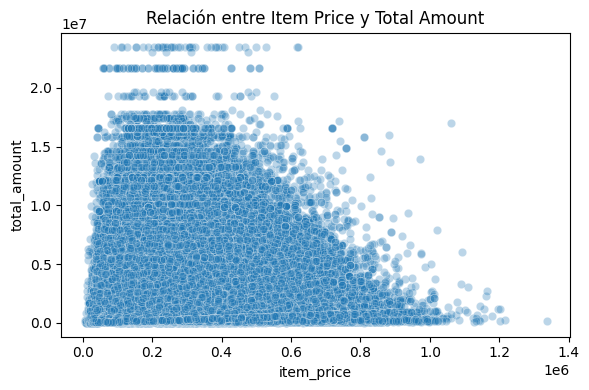

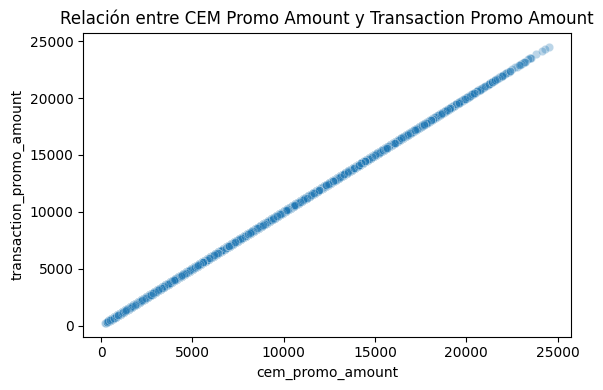

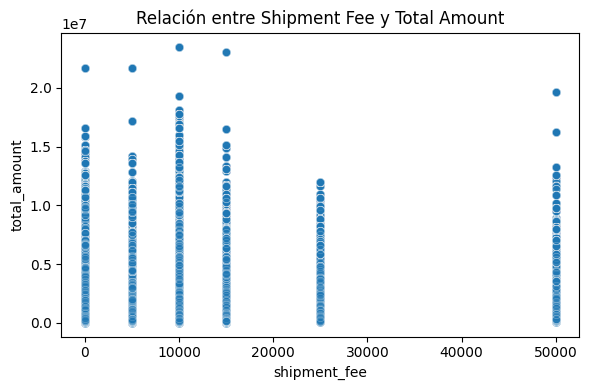

CPU times: total: 40.9 s
Wall time: 41.5 s


In [24]:
%%time
# item_price vs total_amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x='item_price', y='total_amount', data=df, alpha=0.3)
plt.title("Relación entre Item Price y Total Amount")
plt.xlabel("item_price")
plt.ylabel("total_amount")
plt.tight_layout()
plt.show()

# cem_promo_amount vs transaction_promo_amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x='cem_promo_amount', y='transaction_promo_amount', data=df, alpha=0.3)
plt.title("Relación entre CEM Promo Amount y Transaction Promo Amount")
plt.xlabel("cem_promo_amount")
plt.ylabel("transaction_promo_amount")
plt.tight_layout()
plt.show()

# shipment_fee vs total_amount
plt.figure(figsize=(6, 4))
sns.scatterplot(x='shipment_fee', y='total_amount', data=df, alpha=0.3)
plt.title("Relación entre Shipment Fee y Total Amount")
plt.xlabel("shipment_fee")
plt.ylabel("total_amount")
plt.tight_layout()
plt.show()

###  Análisis bivariado: `item_price` vs `total_amount`

La gráfica de dispersión muestra la relación entre el precio unitario del producto (`item_price`) y el importe total de la transacción (`total_amount`). A partir de la visualización se pueden extraer varias observaciones relevantes:

- 🔹 **Distribución triangular invertida**: se observa que los valores de `total_amount` tienden a decrecer a medida que `item_price` aumenta. Es decir, las transacciones con productos más caros suelen tener importes totales más bajos, lo cual es lógico ya que se compran en menor cantidad.

- 🔹 **Alta densidad en precios bajos**: la mayor concentración de puntos se encuentra en el rango de precios entre 50,000 y 400,000 unidades monetarias. Esto sugiere que la mayoría de los productos vendidos están en ese rango.

- 🔹 **Outliers evidentes**: existen puntos aislados con valores extremos de `item_price` (>1.0e6) y `total_amount` (>2.0e7), lo que podría indicar compras empresariales, productos premium o errores en los datos.

- 🔹 **Relación no lineal**: aunque la correlación lineal calculada entre ambas variables es baja (ρ ≈ 0.03), la forma del gráfico revela una dependencia estructural que puede ser explorada mediante transformaciones o modelos no lineales.

####  Implicaciones analíticas

Este tipo de relación sugiere que el importe total depende más de la **cantidad** de productos que del **precio individual**. En modelos de predicción de valor de compra o segmentación por ticket medio, es recomendable incluir tanto `product_quantity` como `item_price` y explorar interacciones entre ambas.



###  Análisis bivariado: `cem_promo_amount` vs `transaction_promo_amount`

La gráfica representa la relación entre el importe promocional registrado en el evento (`cem_promo_amount`) y el importe aplicado en la transacción final (`transaction_promo_amount`). La forma del gráfico revela una relación lineal perfecta entre ambas variables.

####  Observaciones clave:

-  **Relación perfectamente lineal**: todos los puntos se alinean sobre la diagonal, lo que indica una correlación exacta (ρ = 1.00) entre ambas variables.
  
-  **Equivalencia funcional**: este comportamiento sugiere que la variable `transaction_promo_amount` es una copia directa o derivada de `cem_promo_amount`. Ambas contienen la misma información.

-  **Redundancia**: mantener ambas variables en el análisis o modelado puede generar problemas de multicolinealidad o inflar artificialmente la importancia de los descuentos.

####  Implicaciones analíticas

Dado que ambas variables son equivalentes, se recomienda conservar solo una (preferiblemente `transaction_promo_amount`, por estar asociada a la compra efectiva) para simplificar el modelo y evitar redundancias. Esta elección también puede facilitar el análisis de la **elasticidad a promociones** y su impacto en la conversión.



###  Análisis bivariado: `shipment_fee` vs `total_amount`

Esta gráfica de dispersión muestra la relación entre el coste de envío (`shipment_fee`) y el importe total de la transacción (`total_amount`).

####  Observaciones clave:

-  **Distribución escalonada**: los valores de `shipment_fee` no son continuos, sino que aparecen agrupados en bloques claramente definidos (0, 10,000, 20,000, 30,000, 50,000). Esto sugiere que el coste de envío responde a una política de tarifas fijas.

-  **Alta variabilidad del total por tarifa**: dentro de cada bloque de tarifa, el `total_amount` presenta una gran dispersión, lo que indica que el importe del envío no está directamente ligado al volumen económico de la transacción.

-  **Outliers en todas las franjas**: incluso con `shipment_fee = 0`, hay transacciones con `total_amount` superiores a 20 millones, lo cual puede responder a envíos gratuitos en compras grandes, promociones especiales o casos que deben auditarse.

####  Implicaciones analíticas

- La variable `shipment_fee` **no parece ser un predictor directo del importe total**, pero sí podría ser útil como variable categórica (por ejemplo, `fee_tier`) o como segmentador en análisis de clientes premium vs. low-cost.

- Se sugiere codificar esta variable como **ordinal** o discreta, o incluso convertirla a dummies si se decide usarla en modelos de clasificación o regresión.



## Resumen del Análisis Exploratorio de Datos (EDA)

El EDA realizado sobre la tabla `Full_Customer_Event_Data` ha permitido comprender en profundidad la estructura, calidad y distribución de los datos que integran eventos, clientes, productos, transacciones y promociones en un entorno retail digital.

---

### Estructura y volumen

- La tabla contiene más de **12 millones de registros** y **48 columnas**, integrando información de múltiples fuentes (clickstream, productos, pagos, promociones, etc.).
- Se identificaron distintos **tipos de variables**: categóricas, numéricas, temporales, geográficas, booleanas y de texto libre.

---

### Calidad de los datos

- Se evaluaron los **valores nulos por columna**:
  - Variables como `cem_promo_code`, `cem_promo_amount` y `cem_payment_status` presentan más del **90% de valores nulos**.
  - Otras variables clave (`product_quantity`, `item_price`, `was_purchased`) tienen **~85% de nulos**, lo que indica que solo aplican a ciertos tipos de eventos.

---

### Análisis univariado

- Variables numéricas como `item_price`, `total_amount` y `shipment_fee` presentan **alta dispersión** y outliers.
- Se identificaron **variables discretas con valores fijos**, como `shipment_fee`.
- Variables categóricas (`event_name`, `device_type`, `traffic_source`) muestran **patrones dominantes**, útiles para clasificación.

---

### Análisis bivariado

- Se realizaron **scatter plots** interpretando relaciones no lineales, outliers y agrupaciones.

---

### Transformación de variables categóricas

- Variables con **alta cardinalidad o dispersión** fueron agrupadas semánticamente o reducidas:
  - `articletype`, `basecolour`, `subcategory` → agrupación por familias.
  - `cem_promo_code` → convertida en `has_promo` (binaria).
  - `season`, `usage`, `gender`, `home_location` → conservadas tal cual o con reagrupación opcional.
- Se documentaron todas las decisiones en una tabla resumen.

---

## Tareas para la fase de preprocesamiento

A continuación, se detallan las acciones clave a realizar como siguiente paso en la preparación del dataset:

### Limpieza y reducción

- Tratar outliers en variables numéricas mediante winsorización, log-transform o exclusión.

### Ingeniería de variables

- Crear versiones transformadas:
  - `articletype_grouped`, `basecolour_grouped`, `subcategory_grouped`.
  - `has_promo` como binaria a partir de `cem_promo_code`.
- Generar variables temporales derivadas:
  - Día, mes, hora, día de la semana desde `event_time`.
  - Antigüedad del cliente (`today - first_join_date`).

### Codificación para modelos

- One-hot encoding para variables de baja cardinalidad (`device_type`, `traffic_source`, `event_name`, etc.).
- Codificación ordinal o semántica para agrupaciones (`season`, `usage`, `basecolour_grouped`, etc.).
- Codificación supervisada (`target encoding`) opcional para `subcategory_grouped` o `articletype_grouped`.

### Preparación para modelado

- Escalado de variables numéricas (MinMaxScaler o StandardScaler).
- Preparación de datasets para clustering, clasificación o regresión.
- División en subconjuntos según tipo de evento o variable objetivo (`was_purchased`).

---

Este preprocesamiento será la base para las siguientes fases del TFM: **segmentación de clientes**, **sistemas de recomendación personalizados** y **visualización avanzada con Power BI**.
